## Nome : Philipe Formigoni

# Análise de dados de pedidos do E-Commerce brasileiro da plataforma Olist
### Metodologia de aplicação: CRISP-DM para modelagem de dados de negócios

CRISP-DM  (Cross-industry process for data mining) é uma metologia de planejamento de atividade de data mining de forma estruturada.
A ideia é estruturar as fases do projeto de mineração de dados em etapas bem definidas como uma sequência de eventos.
As etapas principais estão listadas abaixo:


**Lista de fases do CRISP-DM:**
1. [Business understanding](#Businessunderstanding)
    1. [Assess the Current Situation](#Assessthecurrentsituation)
        1. [Inventory of resources](#Inventory)
        2. [Requirements, assumptions and constraints](#Requirements)
        3. [Risks and contingencies](#Risks)
        4. [Costs and benefits](#CostBenefit)
    2. [What are the Desired Outputs](#Desiredoutputs)
    3. [What Questions Are We Trying to Answer?](#QA)
2. [Data Understanding](#Dataunderstanding)
    1. [Initial Data Report](#Datareport)
    2. [Describe Data](#Describedata)
    3. [Initial Data Exploration](#Exploredata) 
    4. [Verify Data Quality](#Verifydataquality)
        1. [Missing Data](#MissingData)
    5. [Data Quality Report](#Dataqualityreport)
3. [Data Preparation](#Datapreparation)
    1. [Select Your Data](#Selectyourdata)
    2. [Cleanse the Data](#Cleansethedata)
        1. [Label Encoding](#labelEncoding)
        2. [Drop Unnecessary Columns](#DropCols)
        3. [Altering Datatypes](#AlteringDatatypes)
        4. [Dealing With Zeros](#DealingZeros)
    3. [Construct Required Data](#Constructrequireddata)
    4. [Integrate Data](#Integratedata)
4. [Exploratory Data Analysis](#EDA)
5. [Modelling](#Modelling)
    1. [Modelling Technique](#ModellingTechnique)
    2. [Modelling Assumptions](#ModellingAssumptions)
    3. [Build Model](#BuildModel)
    4. [Assess Model](#AssessModel)
6. [Evaluation](#Evaluation)
7. [Deployment](#Deployment)

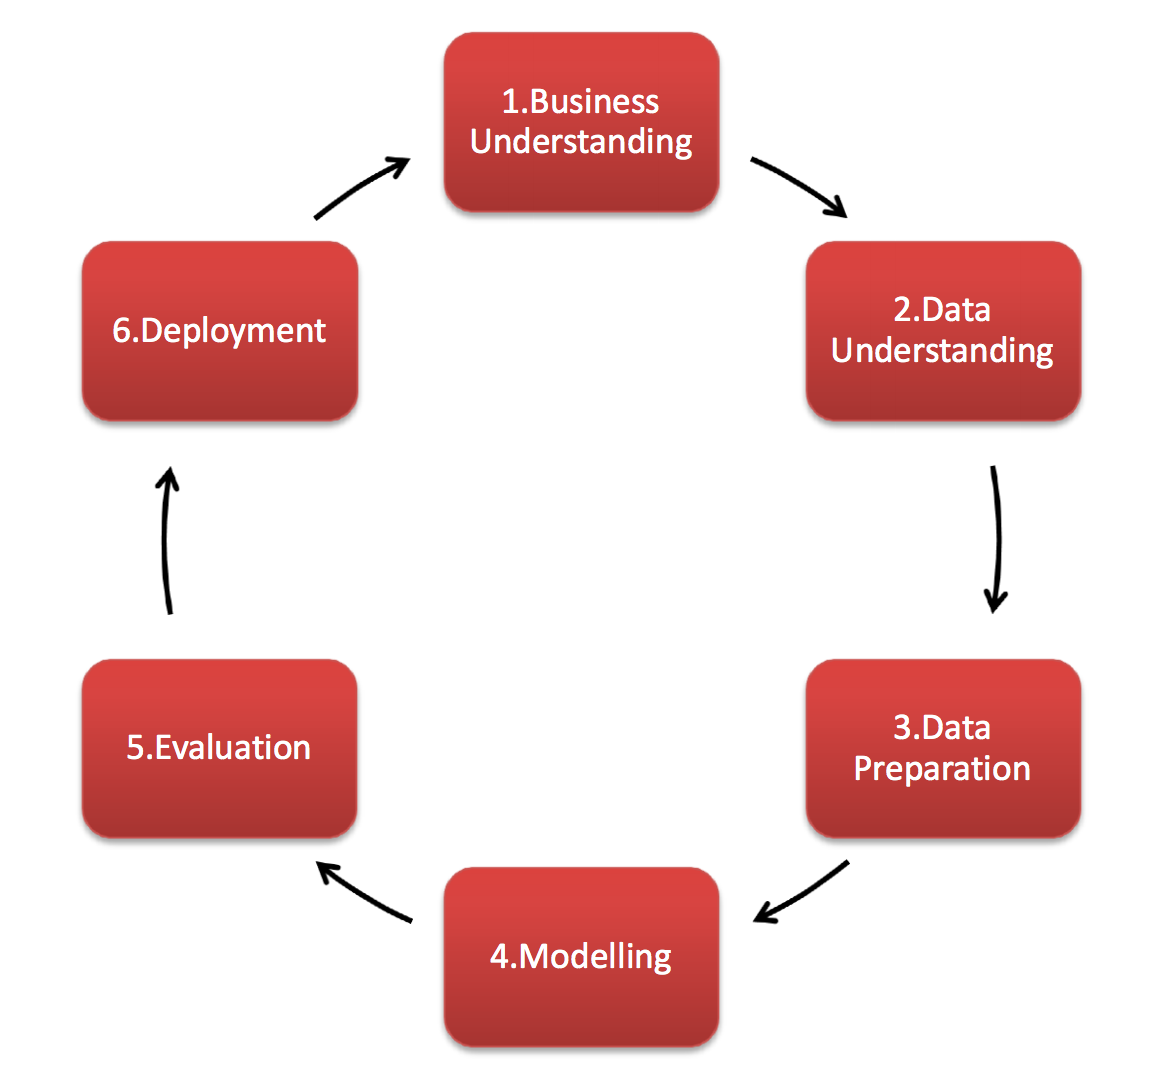

# 1. Determine Business Objectives and Assess the Situation  <a class="anchor" id="Businessunderstanding"></a>
O primeiro estágio é determinar as necessidades do negócio que giram em torno do objetivo de mineração de dados.
Nesse caso, o cenário é o e-commerce brasileiro com dados de pedidos de clientes entre os anos de 2016 e 2018. Dessa forma, o principal objetivo é extrair informações importantes a respeito do cenário logístico que permeia as transações entre localidades de clientes e pontos de vendas ou distribuição, bem como o entendimento do impacto de diferentes categorias de produtos comercializados nessa modalidade.

## 1.1 Avaliação do cenário atual

Em seguida, temos uma análise geral do contexto. Segundo o site https://www.ecommercebrasil.com.br/noticias/e-commerce-fatura-2018-ebit-nielsen/ o e-commerce brasileiro cresceu 12% em 2018, sendo responsável por um faturamento de R$ 52,3 bilhões. Para o ano de 2019 a expectativa foi de uma expansão de 15%. Nesse cenário, as empresas precisam se atentar para o seu planejamento logístico e o atendimento da demanda crescente nesse setor.

Outro artigo interessante em https://www.em.com.br/app/noticia/economia/2018/12/21/internas_economia,1015218/custo-alto-do-frete-atrapalha-e-commerce.shtml mostra que, um dos aspectos problemáticos da estrutura de e-commerce em expansão, são os altos custos de fretes. No contexto avaliado, os custos de fretes são responsáveis por 70% dos abondonos no ato da compra, pois na finalização do pedido o valor do frete pode representar até 40% do valor total da compra. Além disso, o frete de e-commerce pode variar até 400% de uma loja para a outra entre diferentes concorrentes.

### 1.1.1. Lista de recursos disponíveis <a class="anchor" id="Inventory"></a>
Lista de recursos disponíveis para o projeto:
- Ambiente python, jupyter notebook e bibliotecas de análise de dados
- Dados: informações de categorias de produtos, ordens emitidas, preço e frete para diferentes localidades do brasil


### 1.1.2. Requisitos, premissas e limitações do projeto - <a class="anchor" id="Requirements"></a> 
- O projeto deve abordar minimamente os seguintes contextos:
  - Origens e destinos dos produtos
  - Preço dos pedidos e como o frete impacta no valor final
  - Categorias dos produtos vendidos

- Limitações:
  - Os dados disponibilizados de e-commerce são os únicos dados disponíveis para a presente análise e a sua qualidade pode delimitar as abordagens
   quem podem ser realizadas.
   
- Premissas:
  - As perguntas e análises a respeito do contexto e dos dados devem permear os fatores apresentados nos requisitos mas as respostas que podem ser obtidas são de caráter estritamente exploratório ficando a cargo do tempo disponível e da limitação dos dados definirem o que poderá ser encontrado nos dados.
  


### 1.1.3.Riscos e estratégias de contingência <a class="anchor" id="Risks"></a>
- Dados insuficientes podem gerar problemas nas análises
- Informações divergentes ou bases preenchidas de forma incorreta podem comprometer os resultados das análises
- A estratégia básica de contingência é tentar eliminar os dados ruins da base e buscar novas análises possibilitadas por outros dados mais completos

### 1.1.5.Costs and benefits  <a class="anchor" id="CostBenefit"></a>
- N\A

 ## 1.2 What are the desired outputs of the project? <a class="anchor" id="Desiredoutputs"></a>


**Business success criteria**
- Avaliar o cenário do e-commerce nos anos avaliados e gerar insights que ajudem a melhorar as estratégias de vendas do setor



**Data mining success criteria**
- Conseguir explorar os 3 principais pontos contidos nos requisitos de negócio



 ## 1.3 What Questions Are We Trying To Answer? <a class="anchor" id="QA"></a>

- Questões a serem abordadas seguindo os principais topicos do requisito do projeto:
    - Origem e destino de produtos:
        - Quais são as principais localidades que recebem produtos?
        - Dentre essas localidades, o sistema logístico tem funcionado de forma adequada?
    - Preço dos pedidos e como o frete impacta o valor final:
        - Existe alguma relação entre o preço total do item e o frete sobre ele?
        - Quais os produtos com maior valor de frete?
        - Quais os produtos com maior valor de preço?
    - Categorias de produtos:
        - Como as categorias de produtos têm evoluído ao longo do tempo?
        - Quais os principais produtos comercializados?
         

# 2. Data Understanding <a class="anchor" id="Dataunderstanding"></a>
A segunda etapa do processo CRISP-DM requer a aquisição dos dados listados nos recursos do projeto. Essa coleta inicial inclui o carregamento de dados, caso seja necessário para a compreensão dos dados.

## 2.1 Initial Data Report <a class="anchor" id="Datareport"></a>
Lista das fontes de dados adquiridas junto com suas localizações, os métodos usados ​​para adquiri-las e quaisquer problemas encontrados.

In [1]:
# Import Libraries Required
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline
#from geopy import geocoders
from geopy.geocoders import Nominatim
import geopy.distance
import numpy as np
from scipy import stats
import seaborn as sns
import plotly_express as px
import os
from matplotlib.ticker import PercentFormatter
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
sns.set_style("whitegrid")

In [2]:
#Fonte de dados: 
#Defining o caminho dos arquivos: 
orders_path =  os.path.relpath('datasets_ecommerce_brazil_2016_2018\olist_orders.csv')
products_path = os.path.realpath('datasets_ecommerce_brazil_2016_2018\olist_products.csv')
variable_desc_path = os.path.realpath('datasets_ecommerce_brazil_2016_2018\olist_variables_description.csv')

In [3]:
df_orders = pd.read_csv(orders_path)
df_products = pd.read_csv(products_path)
df_var_desc = pd.read_csv(variable_desc_path)

## 2.2 Describe Data <a class="anchor" id="Describedata"></a>
Descrição dos dados adquiridos.

### 2.2.1 Dados de ordens

In [4]:
# Descrevendo as colunas do dataframe de ordens
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   product_id                     112650 non-null  object 
 2   seller_id                      112650 non-null  object 
 3   customer_id                    112650 non-null  object 
 4   price                          112650 non-null  float64
 5   freight_value                  112650 non-null  float64
 6   order_delivered_customer_date  110196 non-null  object 
 7   order_estimated_delivery_date  112650 non-null  object 
 8   seller_city                    112650 non-null  object 
 9   seller_state                   112650 non-null  object 
 10  customer_city                  112650 non-null  object 
 11  customer_state                 112650 non-null  object 
dtypes: float64(2), object(10)
memo

In [5]:
df_orders.shape

(112650, 12)

In [6]:
# Verificando as estatísticas dos dados do dataframe de ordens
df_orders.describe()

price  freight_value
count  112650.000000  112650.000000
mean      120.653739      19.990320
std       183.633928      15.806405
min         0.850000       0.000000
25%        39.900000      13.080000
50%        74.990000      16.260000
75%       134.900000      21.150000
max      6735.000000     409.680000

In [7]:
# Verificando uma amostra dos dados
df_orders.head(5)

order_id                        product_id  \
0  00010242fe8c5a6d1ba2dd792cb16214  4244733e06e7ecb4970a6e2683c13e61   
1  00018f77f2f0320c557190d7a144bdd3  e5f2d52b802189ee658865ca93d83a8f   
2  000229ec398224ef6ca0657da4fc703e  c777355d18b72b67abbeef9df44fd0fd   
3  00024acbcdf0a6daa1e931b038114c75  7634da152a4610f1595efa32f14722fc   
4  00042b26cf59d7ce69dfabb4e55b4fd9  ac6c3623068f30de03045865e4e10089   

                          seller_id                       customer_id   price  \
0  48436dade18ac8b2bce089ec2a041202  3ce436f183e68e07877b285a838db11a   58.90   
1  dd7ddc04e1b6c2c614352b383efe2d36  f6dd3ec061db4e3987629fe6b26e5cce  239.90   
2  5b51032eddd242adc84c38acab88f23d  6489ae5e4333f3693df5ad4372dab6d3  199.00   
3  9d7a1d34a5052409006425275ba1c2b4  d4eb9395c8c0431ee92fce09860c5a06   12.99   
4  df560393f3a51e74553ab94004ba5c87  58dbd0b2d70206bf40e62cd34e84d795  199.90   

   freight_value order_delivered_customer_date order_estimated_delivery_date  \
0          13.29           2017-09-20 23:43:48           2017-09-29 00:00:00   
1          19.93           2017-05-12 16:04:24           2017-05-15 00:00:00   
2          17.87           2018-01-22 13:19:16           2018-02-05 00:00:00   
3          12.79           2018-08-14 13:32:39           2018-08-20 00:00:00   
4          18.14           2017-03-01 16:42:31           2017-03-17 00:00:00   

     seller_city seller_state          customer_city customer_state  
0  volta redonda           SP  campos dos goytacazes             RJ  
1      sao paulo           SP        santa fe do sul             SP  
2  borda da mata           MG          para de minas             MG  
3         franca           SP                atibaia             SP  
4         loanda           PR        varzea paulista             SP

### 2.2.2 Dados de produtos

In [8]:
# Descrevendo as colunas do dataframe de produtos
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   product_id             32951 non-null  object
 1   product_category_name  32341 non-null  object
dtypes: object(2)
memory usage: 515.0+ KB


In [9]:
df_products.shape

(32951, 2)

In [10]:
# Verificando as estatísticas dos dados do dataframe de produtos
df_products.describe()

product_id product_category_name
count                              32951                 32341
unique                             32951                    73
top     1e9e8ef04dbcff4541ed26657ea517e5       cama_mesa_banho
freq                                   1                  3029

In [11]:
# Verificando uma amostra dos dados
df_products.head(5)

product_id  product_category_name
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer
3  cef67bcfe19066a932b7673e239eb23d                  bebes
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas

### 2.2.2 Dados de descrição das variáveis

In [12]:
# Descrevendo as colunas do dataframe de descrição das variáveis
df_var_desc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Variável   14 non-null     object
 1   Dataset    14 non-null     object
 2   Descrição  14 non-null     object
dtypes: object(3)
memory usage: 464.0+ bytes


In [13]:
df_var_desc.shape

(14, 3)

In [14]:
# Verificando uma amostra dos dados
df_var_desc.head(14)

Variável         Dataset  \
0                        order_id    olist_orders   
1                      product_id    olist_orders   
2                       seller_id    olist_orders   
3                     customer_id    olist_orders   
4                           price    olist_orders   
5                   freight_value    olist_orders   
6   order_delivered_customer_date    olist_orders   
7   order_estimated_delivery_date    olist_orders   
8                     seller_city    olist_orders   
9                    seller_state    olist_orders   
10                  customer_city    olist_orders   
11                 customer_state    olist_orders   
12                     product_id  olist_products   
13          product_category_name  olist_products   

                                            Descrição  
0                       Identificador único do pedido  
1                      Identificador único do produto  
2                     Identificador único do vendedor  
3                      Identificador único do cliente  
4                                       Preço do item  
5   Valor do frete do item (se um pedido tiver mai...  
6                     Data real da entrega ao cliente  
7       Data de entrega estimada informada ao cliente  
8                                  Cidade do vendedor  
9                                  Estado do vendedor  
10                                  Cidade do cliente  
11                                  Estado do cliente  
12                     Identificador único do produto  
13               Nome da categoria (nicho) do produto

### 2.2.3 Unindo os dataframes para análise conjunta

<p>Como os dados parecem se complementar, será analisado de forma conjunta a partir desse ponto.

In [15]:
# Criação do dataframe único dos dados

df_data = pd.merge(df_orders, df_products, on='product_id')

In [16]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   product_id                     112650 non-null  object 
 2   seller_id                      112650 non-null  object 
 3   customer_id                    112650 non-null  object 
 4   price                          112650 non-null  float64
 5   freight_value                  112650 non-null  float64
 6   order_delivered_customer_date  110196 non-null  object 
 7   order_estimated_delivery_date  112650 non-null  object 
 8   seller_city                    112650 non-null  object 
 9   seller_state                   112650 non-null  object 
 10  customer_city                  112650 non-null  object 
 11  customer_state                 112650 non-null  object 
 12  product_category_name         

## 2.3 Verify Data Quality <a class="anchor" id="Verifydataquality"></a>

### 2.3.1. Missing Data <a class="anchor" id="MissingData"></a>
Análise de dados faltantes.

In [17]:
df_data.isnull().sum()/len(df_data)*100

order_id                         0.000000
product_id                       0.000000
seller_id                        0.000000
customer_id                      0.000000
price                            0.000000
freight_value                    0.000000
order_delivered_customer_date    2.178429
order_estimated_delivery_date    0.000000
seller_city                      0.000000
seller_state                     0.000000
customer_city                    0.000000
customer_state                   0.000000
product_category_name            1.422992
dtype: float64

In [18]:
def missing_values_table(df_data):
        mis_val = df_data.isnull().sum()
        mis_val_percent = 100 * df_data.isnull().sum() / len(df_data)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : '# valores faltantes', 1 : r'% do total de valores'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        r'% do total de valores', ascending=False).round(1)
        print ("O dataframe possui " + str(df_data.shape[1]) + " colunas.\n"      
            "Existem " + str(mis_val_table_ren_columns.shape[0]) +
              " colunas com dados faltantes descritas abaixo:")
        return mis_val_table_ren_columns

In [19]:
missing_values_table(df_data)

O dataframe possui 13 colunas.
Existem 2 colunas com dados faltantes descritas abaixo:


# valores faltantes  % do total de valores
order_delivered_customer_date                 2454                    2.2
product_category_name                         1603                    1.4

In [20]:
# Identificando colunas com mais de 50% de dados faltantes
df_missing = missing_values_table(df_data);
missing_columns = list(df_missing[df_missing['% do total de valores'] > 50].index)
print(f'Serão removidas {len(missing_columns)} colunas.')

O dataframe possui 13 colunas.
Existem 2 colunas com dados faltantes descritas abaixo:
Serão removidas 0 colunas.


In [21]:
# Drop the columns
df_data = df_data.drop(list(missing_columns))

### 2.3.2 Verificando duplicidades nos dados

In [22]:
#Verificar se não houve nenhuma duplicação de dados
print(f'shape novo dataframe: {df_data.shape} versus shape antigo: {df_orders.shape} versus dados sem duplicidade {df_orders.drop_duplicates().shape}')
print(f'O novo dataframe possui {df_data.duplicated().sum()} linhas duplicadas.')

shape novo dataframe: (112650, 13) versus shape antigo: (112650, 12) versus dados sem duplicidade (102425, 12)
O novo dataframe possui 10225 linhas duplicadas.


In [23]:
df_data[df_data.duplicated()].sort_values(by=list(df_data.columns))

order_id                        product_id  \
589    0008288aa423d2a3f00fcb17cd7d8719  368c6c730842d78016ad823897a372db   
1316   00143d0f86d6fbd9f9b38ab440ac16f5  e95ee6822b66ac6058e2e4aff656071a   
1317   00143d0f86d6fbd9f9b38ab440ac16f5  e95ee6822b66ac6058e2e4aff656071a   
1541   001ab0a7578dd66cd4b0a71f5b6e1e41  0b0172eb0fd18479d29c3bc122c058c2   
1542   001ab0a7578dd66cd4b0a71f5b6e1e41  0b0172eb0fd18479d29c3bc122c058c2   
...                                 ...                               ...   
1396   ffecd5a79a0084f6a592288c67e3c298  50fd2b788dc166edd20512370dac54df   
21997  fff8287bbae429a99bb7e8c21d151c41  bee2e070c39f3dd2f6883a17a5f0da45   
23319  fffb9224b6fc7c43ebb0904318b10b5f  43423cdffde7fda63d0414ed38c11a73   
23320  fffb9224b6fc7c43ebb0904318b10b5f  43423cdffde7fda63d0414ed38c11a73   
23321  fffb9224b6fc7c43ebb0904318b10b5f  43423cdffde7fda63d0414ed38c11a73   

                              seller_id                       customer_id  \
589    1f50f920176fa81dab994f9023523100  2355af7c75e7c98b43a87b2a7f210dc5   
1316   a17f621c590ea0fab3d5d883e1630ec6  2e45292979b9b2700ea09560eeb0f803   
1317   a17f621c590ea0fab3d5d883e1630ec6  2e45292979b9b2700ea09560eeb0f803   
1541   5656537e588803a555b8eb41f07a944b  8bb3bef4e75a95524235cdc11a7331af   
1542   5656537e588803a555b8eb41f07a944b  8bb3bef4e75a95524235cdc11a7331af   
...                                 ...                               ...   
1396   8b321bb669392f5163d04c59e235e066  8afa5a415d65a08e3a68b1d7f9ddd8a5   
21997  4e922959ae960d389249c378d1c939f5  6c1e92a209dbf868706caa831090941e   
23319  b1fc4f64df5a0e8b6913ab38803c57a9  4d3abb73ceb86353aeadbe698aa9d5cb   
23320  b1fc4f64df5a0e8b6913ab38803c57a9  4d3abb73ceb86353aeadbe698aa9d5cb   
23321  b1fc4f64df5a0e8b6913ab38803c57a9  4d3abb73ceb86353aeadbe698aa9d5cb   

        price  freight_value order_delivered_customer_date  \
589     49.90          13.37           2018-02-26 13:55:22   
1316    21.33          15.10           2017-10-27 18:43:56   
1317    21.33          15.10           2017-10-27 18:43:56   
1541    24.89          17.63           2018-01-17 20:43:29   
1542    24.89          17.63           2018-01-17 20:43:29   
...       ...            ...                           ...   
1396    21.90          15.79           2018-03-29 14:37:05   
21997  180.00          48.14           2018-04-07 10:07:48   
23319   55.00          34.19           2017-11-17 19:41:42   
23320   55.00          34.19           2017-11-17 19:41:42   
23321   55.00          34.19           2017-11-17 19:41:42   

      order_estimated_delivery_date            seller_city seller_state  \
589             2018-03-06 00:00:00  sao jose do rio preto           SP   
1316            2017-11-06 00:00:00               sorocaba           SP   
1317            2017-11-06 00:00:00               sorocaba           SP   
1541            2018-01-29 00:00:00               brasilia           DF   
1542            2018-01-29 00:00:00               brasilia           DF   
...                             ...                    ...          ...   
1396            2018-03-22 00:00:00              sao paulo           SP   
21997           2018-04-19 00:00:00                jacarei           SP   
23319           2017-11-27 00:00:00            sao goncalo           RJ   
23320           2017-11-27 00:00:00            sao goncalo           RJ   
23321           2017-11-27 00:00:00            sao goncalo           RJ   

       customer_city customer_state   product_category_name  
589          jandira             SP      ferramentas_jardim  
1316         goiania             GO           esporte_lazer  
1317         goiania             GO           esporte_lazer  
1541        salvador             BA             eletronicos  
1542        salvador             BA             eletronicos  
...              ...            ...                     ...  
1396        salvador             BA             eletronicos  
21997    joao pessoa             PB  in

<p> Como os dados de ordens, as datas e outros aspectos são idênticos, as duplicações não parecem ser ocorrências diferentes, logo, as duplicidades serão removidas para melhorar as análises posteriores<p>

In [24]:
df_data = df_data.drop_duplicates()

## 2.4 Initial Data Exploration  <a class="anchor" id="Exploredata"></a>
Exploração inicial dos dados sobre distribuições, fatores importante e características principais necessárias aos dados.

### 2.4.1 Distributions  <a class="anchor" id="Distributions"></a>

In [25]:
df_data.columns

Index(['order_id', 'product_id', 'seller_id', 'customer_id', 'price',
       'freight_value', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'seller_city', 'seller_state',
       'customer_city', 'customer_state', 'product_category_name'],
      dtype='object')

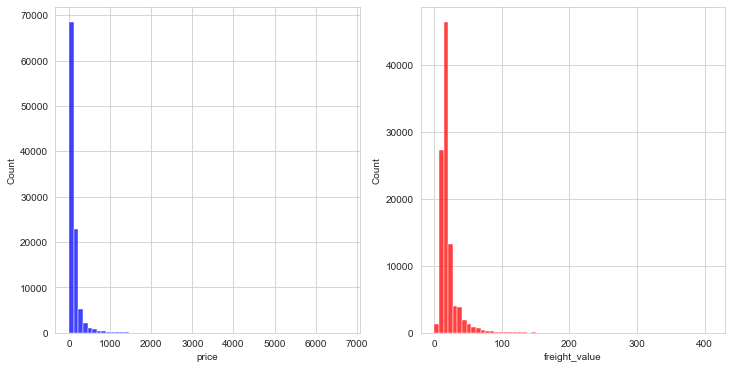

In [26]:
# Verificando as distribuições das variáveis de preço e frete
fig, ax = plt.subplots(figsize=(12,6), ncols=2, nrows=1)
sns.histplot(df_data['price'], bins=60, color='blue', label='Preço', ax=ax[0])
sns.histplot(df_data['freight_value'], bins=60, color='red', label='Frete', ax=ax[1])
plt.show()

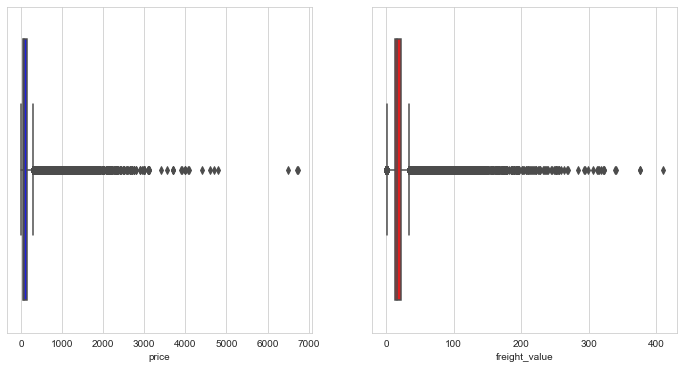

In [27]:
# Verificando as distribuições das variáveis de preço e frete
fig, ax = plt.subplots(figsize=(12,6), ncols=2, nrows=1)
sns.boxplot(data=df_data, x='price', color='blue', ax=ax[0])
sns.boxplot(data=df_data, x='freight_value', color='red', ax=ax[1])
plt.show()

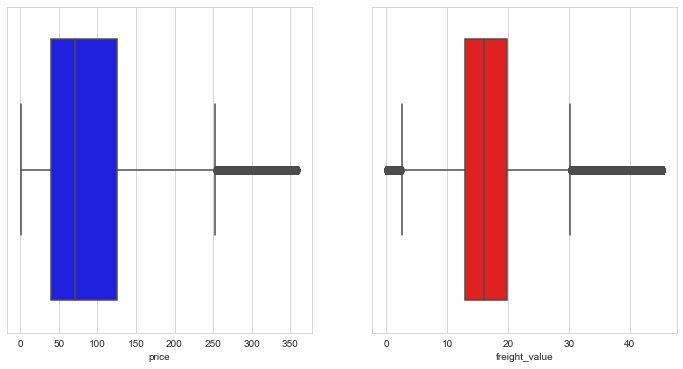

In [28]:
#Removendo possíveis outliers
q_high_price = df_data['price'].quantile(0.95)
q_high_freight = df_data['freight_value'].quantile(0.95)
price_no_outliers = df_data[df_data['price'] < q_high_price]
freight_no_outliers = df_data[df_data['freight_value'] < q_high_freight]
fig, ax = plt.subplots(figsize=(12,6), ncols=2, nrows=1)
sns.boxplot(data=price_no_outliers, x='price', color='blue', ax=ax[0])
sns.boxplot(data=freight_no_outliers, x='freight_value', color='red', ax=ax[1])
plt.show()


### 2.4.2 Correlations  <a class="anchor" id="Correlations"></a>
Verificando correlações nos dados

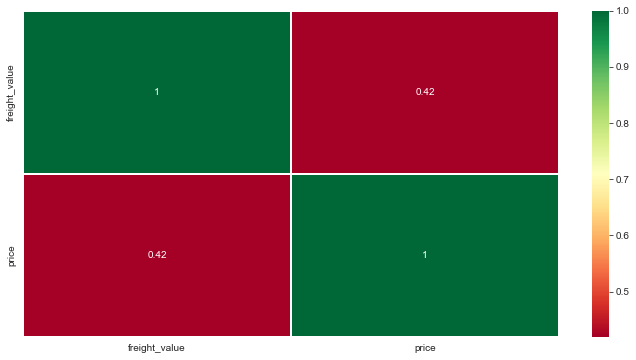

In [29]:
# Correlação entre preço e frete
plt.figure(figsize=(12,6))
sns.heatmap(df_data[['freight_value', 'price']].corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
plt.show()

## 2.5 Data Quality Report <a class="anchor" id="Dataqualityreport"></a>
- Os dados possuem colunas referentes a cidades e estados mas não possui coordenadas geográficas dificultando análises em mapas e localidades.
Estratégias de preenchimento desses dados podem ser tomadas mas não garantem a qualidade das buscas, portanto, a análise de mapas pode ser explorada mas a qualidade não pode ser garantida.

- Preço e frete não possuem uma correlação positiva muito forte. Pode ser dificil achar um padrão entre as duas variáveis que retornem alguma resposta das perguntas avaliadas.
Algumas categorias em alguns pedidos não foram preenchidas que correspondem a quase 1.5% dos dados. Parece ser bem razoável que isso não irá impactar totalmente nas análises.

- O mesmo vale para as datas de entregas reais que correspondem a 2% dos dados e não devem impactar de forma significativa nas análises temporais.

# 3. Data Preperation <a class="anchor" id="Datapreperation"></a>
Preparação dos dados necessários para as análises

### 3.1 Select Your Data <a class="anchor" id="Selectyourdata"></a>
Os dados selecionados serão todas as bases disponibilizadas removidas as duplicidades encontradas

### 3.2 Clean The Data <a class="anchor" id="Cleansethedata"></a>
Essa tarefa envolve elevar a qualidade dos dados. Isso pode envolver a seleção de subconjuntos limpos de dados, a inserção de padrões adequados ou técnicas mais ambiciosas, como a estimativa de dados ausentes por modelagem.

### 3.2.1 Label Encoding <a class="anchor" id="labelEncoding"></a>
Transformação de dados categóricos em numéricos mantendo a informação contida nas categorias 
<p> Não será explorado pelo tamanho elevado das categorias.

### 3.2.2 Drop Unnecessary Columns <a class="anchor" id="DropCols"></a>
Remoção de colunas desnecessárias. Não será feito pois o conjunto de dados não possui muitas colunas e elas serão exploradas mais a frente.

### 3.2.3 Altering Data Types <a class="anchor" id="AlteringDatatypes"></a>
Alteração dos tipos de dados para facilitar as análises.

In [30]:
# Transformando as variáveis de data em datas reais
df_data['data entrega prevista'] = pd.to_datetime(df_data['order_estimated_delivery_date'])
df_data['data entrega real'] = pd.to_datetime(df_data['order_delivered_customer_date'])

### 3.2.4 Dealing With Zeros <a class="anchor" id="DealingZeros"></a>
Para  os campos de data será usado o campo de data prevista de entrega para as análises temporais por possuir dados mais completos.

In [31]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102425 entries, 0 to 112649
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       102425 non-null  object        
 1   product_id                     102425 non-null  object        
 2   seller_id                      102425 non-null  object        
 3   customer_id                    102425 non-null  object        
 4   price                          102425 non-null  float64       
 5   freight_value                  102425 non-null  float64       
 6   order_delivered_customer_date  100195 non-null  object        
 7   order_estimated_delivery_date  102425 non-null  object        
 8   seller_city                    102425 non-null  object        
 9   seller_state                   102425 non-null  object        
 10  customer_city                  102425 non-null  object        
 11  

### 3.2.5 Dealing With Duplicates <a class="anchor" id="DealingDuplicates"></a>
A remoção de duplicidades já foi feita para avaliar a completude dos dados.

## 3.3 Construct Required Data   <a class="anchor" id="Constructrequireddata"></a>
Construção de atributos necessários para as análises.
Criação de novas variáveis derivadas de outras e campos calculados.


In [32]:
# Recriando indices após os filtros
df_data.reset_index(drop=True, inplace=True)

In [33]:
# Criar variável de dias de atraso entre entrega prevista e entrega real


atrasos_entregas = (df_data['data entrega real'] - df_data['data entrega prevista']).dt.days

In [34]:
# Criando variáveis temporais
df_data['ano'] = df_data['data entrega prevista'].apply(lambda x: x.strftime('%Y') if pd.notnull(x)  else np.nan)
df_data['ano_mes'] = df_data['data entrega prevista'].apply(lambda x: x.strftime('%Y%m') if pd.notnull(x)  else np.nan)

In [35]:
# Criando coordenadas geográficas das cidades para criação de mapas

# Criando função para trazer latitude e longitude (o processo total levaria bastante tempo).

# A API escolhida, embora seja mais lenta, foi a que obteve melhores resultados para conversão de cidades.

# A ideia é poder rodar o processo de forma incremental sempre que for necessário e salvar em um arquivo pickle.

# Como o request do Nominatim é demorado, é necessário salvar o request em um arquivo para ser usado posteriormente

dic_state = {'RJ' : 'Rio de Janeiro',
             'GO' : 'Goias',
             'MG' : 'Minas Gerais',
             'PR' : 'Parana',
             'BA' : 'Bahia',
             'PE' : 'Pernambuco',
             'SP' : 'Sao Paulo',
             'DF' : 'Distrito Federal',
             'MA' : 'Maranhao',
             'RS' : 'Rio Grande do Sul',
             'SC' : 'Santa Catarina',
             'ES' : 'Espirito Santo',
             'AM' : 'Amazonas',
             'MT' : 'Mato Grosso',
             'SE' : 'Sergipe',
             'AL' : 'Alagoas',
             'RO' : 'Rondonia',
             'CE' : 'Ceara',
             'PB' : 'Paraiba',
             'MS' : 'Mato Grosso do Sul',
             'PI' : 'Piaui',
             'PA' : 'Para',
             'RN' : 'Rio Grande do Norte',
             'RR' : 'Roraima',
             'AC' : 'Acre',
             'TO' : 'Tocantins',
             'AP' : 'Amapa'}


try:
    cities_coord_list = pd.read_pickle('cities_coord.pkl')
    
    
except FileNotFoundError as e:
    # Criando um arquivo de coordenadas caso não exista 
    print (e)
    cities_coord_list = pd.DataFrame(columns=['city', 'lat', 'lon'])
    cities_coord_list.to_pickle('cities_coord.pkl')
    
    
loc = Nominatim(user_agent="GetLoc")

def get_lat_lon(city, state=False):
    """Retorna latitude e longitude de uma cidade"""
    if not state:
        
        try:
            location = loc.geocode(city)
            return location.latitude, location.longitude
        except:
            return None, None
    else:
        
        try:
            location = loc.geocode(state)
            return location.latitude, location.longitude
        except:
            return None, None
      
    
try:

    # Identificando cidades únicas para reduzir o tempo de busca

    cities = df_data['customer_city'].drop_duplicates()
    cities = pd.concat([cities, df_data['seller_city'].drop_duplicates()]).drop_duplicates()

    cities_coord = pd.DataFrame(columns=['city', 'lat', 'lon'])

    # Removendo as cidades que já foram processadas e reprocessando as nulas

    cities_coord_list = cities_coord_list[(~cities_coord_list['lat'].isna()) | (~cities_coord_list['lon'].isna())]

    cities_coord['city'] = cities
    cities_coord = cities_coord[(~cities_coord['city'].isin(cities_coord_list['city']))]
    print(len(cities_coord))

    #Processando as requests em batchs de 20 cidades por vez
    cities_coord = cities_coord



    cities_coord['lat'], cities_coord['lon'] = zip(*cities_coord['city'].apply(get_lat_lon))

    new_cities_coord_list = pd.concat([cities_coord_list, cities_coord]) 

    # Tentando filtrar os nulls por coordenadas estaduais

    cust_sc = df_data[['customer_state', 'customer_city']].drop_duplicates().rename({'customer_state' : 'state', 'customer_city' : 'city'}, axis=1) # info de estados dos clientes
    seller_sc = df_data[['seller_state', 'seller_city']].drop_duplicates().rename({'seller_state' : 'state', 'seller_city' : 'city'}, axis=1) # info de estados dos vendedores
    state_list = pd.concat([cust_sc, seller_sc]).drop_duplicates() # junção de estados clientes e vendedores

    coord_state_fill = new_cities_coord_list[new_cities_coord_list['lat'].isna()].merge(state_list, on='city') # coordenadas nulas para preencher com estados
    coord_state_fill['state'] = coord_state_fill['state'].apply(lambda x: dic_state[x]) # transformando estados em nomes

    coord_state_fill['lat'], coord_state_fill['lon'] = zip(*coord_state_fill['state'].apply(get_lat_lon)) # pegando coordenadas de estados

    new_cities_coord_list = new_cities_coord_list.dropna(subset=['lat'])
    new_cities_coord_list = pd.concat([new_cities_coord_list, coord_state_fill[['city', 'lat', 'lon']]])

    

    new_cities_coord_list.to_pickle('cities_coord.pkl')
    
    

except Exception as e:
    
    print (f'ERROR: {e}')
    
    new_cities_coord_list = cities_coord_list


0
ERROR: not enough values to unpack (expected 2, got 0)


In [36]:
# Fazendo o mesmo para os estados

try:
    states_coord_list = pd.read_pickle('states_coord.pkl')
    
    
except FileNotFoundError as e:
    # Criando um arquivo de coordenadas caso não exista 
    print (e)
    states_coord_list = pd.DataFrame(columns=['state', 'lat', 'lon'])
    states_coord_list.to_pickle('states_coord.pkl')
    
    
loc = Nominatim(user_agent="GetLoc")

def get_lat_lon_state(state):
    """Retorna latitude e longitude de um estado"""
            
    try:
        location = loc.geocode(state)
        return location.latitude, location.longitude
    except:
        return None, None
    
    
    
    
try:

    # Identificando cidades únicas para reduzir o tempo de busca

    states = df_data['customer_state'].drop_duplicates()
    states = pd.concat([states, df_data['seller_state'].drop_duplicates()]).drop_duplicates()

    states_coord = pd.DataFrame(columns=['state', 'lat', 'lon'])

    # Removendo as cidades que já foram processadas

    states_coord['state'] = states
    states_coord['state_name'] = states_coord['state'].apply(lambda x: dic_state[x]) # transformando estados em nomes
    
    states_coord = states_coord[(~states_coord['state'].isin(states_coord_list['state']))]
    
    print(len(states_coord))

    #Processando as requests em batchs de 20 cidades por vez
    states_coord = states_coord[:30]



    states_coord['lat'], states_coord['lon'] = zip(*states_coord['state_name'].apply(get_lat_lon_state))

    new_states_coord_list = pd.concat([states_coord_list, states_coord]) 



    new_states_coord_list.to_pickle('states_coord.pkl')
    
    

except Exception as e:
    
    print (f'ERROR: {e}')
    
    new_states_coord_list = states_coord_list

0
ERROR: not enough values to unpack (expected 2, got 0)


In [37]:
# Corrigindo as coordenadas para as localidades: DF, PA e AC
corr_lat_lon = (('DF',-15.7801, -47.9292), ('PA',-1.45502, -48.5024), ('AC', -9.974, -67.8076))
corr_lat_lon = pd.DataFrame(corr_lat_lon, columns=['state', 'lat', 'lon'])
new_states_coord_list['lat'] = new_states_coord_list[['state', 'lat']].apply(lambda x: corr_lat_lon[corr_lat_lon['state'] == x[0]]['lat'].values[0] if x[0] in corr_lat_lon['state'].values else x[1], axis=1)
new_states_coord_list['lon'] = new_states_coord_list[['state', 'lon']].apply(lambda x: corr_lat_lon[corr_lat_lon['state'] == x[0]]['lon'].values[0] if x[0] in corr_lat_lon['state'].values else x[1], axis=1)

## 3.4 Integrate Data  <a class="anchor" id="Integratedata"></a>
Integração de todos os dados gerados com os dados originais das bases


### Construção do Dataset primário
Join data 

In [38]:
# Integrando atrasos

df_data['atrasos'] = atrasos_entregas

In [39]:
# Integrando coordenadas geográficas

print(f' Cidades distintas convertidas: {len(new_cities_coord_list)}.')
print('Valores nulos (não encontrados):')
print(new_cities_coord_list.isna().sum())
print('\n <==========================================================> \n')
print(f' Cidades distintas convertidas: {len(new_states_coord_list)}.')
print('Valores nulos (não encontrados):')
print(new_states_coord_list.isna().sum())


 Cidades distintas convertidas: 4188.
Valores nulos (não encontrados):
city    0
lat     0
lon     0
dtype: int64

 <==========================================================> 

 Cidades distintas convertidas: 27.
Valores nulos (não encontrados):
state         0
lat           0
lon           0
state_name    0
dtype: int64


In [40]:
# Atribuir coordenadas das cidades e estados  a base original

df_data[['customer_lat', 'customer_lon']] = df_data.merge(new_cities_coord_list, left_on='customer_city', right_on='city', how='left')[['lat', 'lon']]
df_data[['seller_lat', 'seller_lon']] = df_data.merge(new_cities_coord_list, left_on='seller_city', right_on='city', how='left')[['lat', 'lon']]
df_data[['customer_state_lat', 'customer_state_lon']] = df_data.merge(new_states_coord_list, left_on='customer_state', right_on='state', how='left')[['lat', 'lon']]
df_data[['seller_state_lat', 'seller_state_lon']] = df_data.merge(new_states_coord_list, left_on='seller_state', right_on='state', how='left')[['lat', 'lon']]

In [41]:
# Gerando distancias entre os estados de origem e destino

df_data['distancia origem destino'] = df_data[['seller_state_lat',
                                               'seller_state_lon',
                                               'customer_state_lat',
                                               'customer_state_lon']].apply(lambda x: geopy.distance.geodesic((x[0], x[1]),(x[2], x[3])).km, axis=1)

In [42]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102425 entries, 0 to 102424
Data columns (total 27 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       102425 non-null  object        
 1   product_id                     102425 non-null  object        
 2   seller_id                      102425 non-null  object        
 3   customer_id                    102425 non-null  object        
 4   price                          102425 non-null  float64       
 5   freight_value                  102425 non-null  float64       
 6   order_delivered_customer_date  100195 non-null  object        
 7   order_estimated_delivery_date  102425 non-null  object        
 8   seller_city                    102425 non-null  object        
 9   seller_state                   102425 non-null  object        
 10  customer_city                  102425 non-null  object        
 11  

# 4. Exploratory Data Analysis <a class="anchor" id="EDA"></a>
Análise exploratória dos dados observando os objetivos iniciais determinados.

#### 4.1 Verificando a origem e os destinos dos produtos

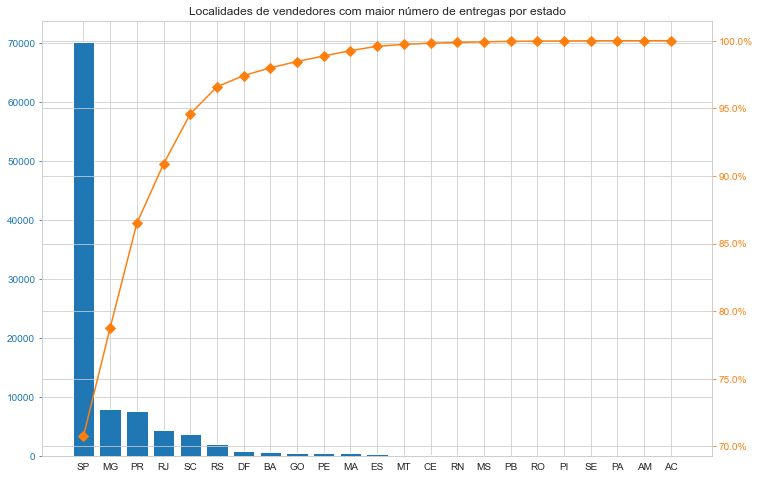

In [43]:
# Pontos de venda/distribuição com maiores números de entregas por estado


df_state = df_data.groupby('seller_state').agg({'order_id' : 'nunique'}).reset_index().sort_values(by='order_id', ascending=False)
df_state['cumpercentage'] = df_state['order_id'].cumsum()/df_state['order_id'].sum()*100

fig, ax = plt.subplots(figsize=(12,8))
ax.bar(df_state['seller_state'].unique(), df_state['order_id'], color='C0')
ax2 = ax.twinx()
ax2.plot(df_state['seller_state'].unique(), df_state['cumpercentage'], color='C1', marker='D', ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())
#plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)
ax.tick_params(axis='y', colors='C0')
ax2.tick_params(axis='y', colors='C1')
plt.xticks(fontsize=12)
#ax.set_xticks(ax.get_xticks()[::2])
plt.title('Localidades de vendedores com maior número de entregas por estado')
plt.show()

<p> O gráfico mostra que mais de 80% das ordens que partem das áreas de vendas estão concentradas nos estados de SP, MG e PR.
    Isso mostra que esses estados possuem grande parte do fluxo logístico das vendas, aspecto importante
    para a tomada de decisão a respeito da estrutura logística de atendimento aos clientes desses e de outros estados. Essas localidades podem ser consideradas pontos de venda/distribuição estratégicos<p>

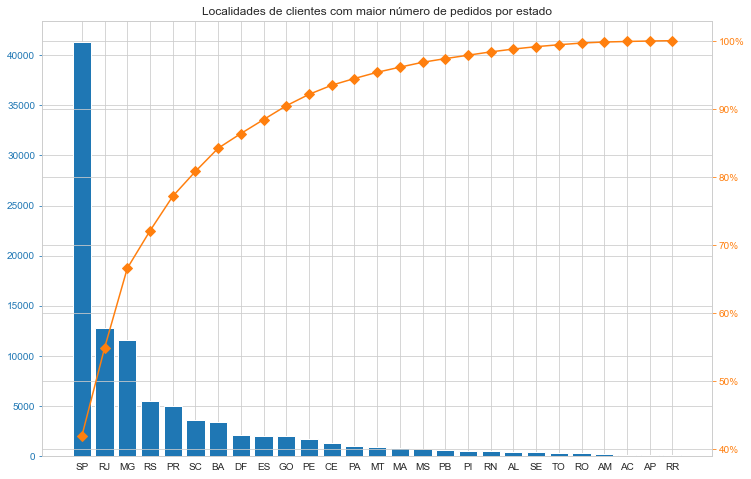

In [44]:
# Estados com maiores quantidades de ordens provenientes de clientes


df_cust_state = df_data.groupby('customer_state').agg({'order_id' : 'nunique'}).reset_index().sort_values(by='order_id', ascending=False)
df_cust_state['cumpercentage'] = df_cust_state['order_id'].cumsum()/df_cust_state['order_id'].sum()*100

fig, ax = plt.subplots(figsize=(12,8))
ax.bar(df_cust_state['customer_state'].unique(), df_cust_state['order_id'], color='C0')
ax2 = ax.twinx()
ax2.plot(df_cust_state['customer_state'].unique(), df_cust_state['cumpercentage'], color='C1', marker='D', ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())
#plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)
ax.tick_params(axis='y', colors='C0')
ax2.tick_params(axis='y', colors='C1')
plt.xticks(fontsize=12)
#ax.set_xticks(ax.get_xticks()[::2])
plt.title('Localidades de clientes com maior número de pedidos por estado')
plt.show()

<p> O gráfico mostra que mais de 80% das requisições de compras partem de clientes localizados nos estados de SP, RJ, MG, RS, PR e SC.
    Comparando com o gráfico anterior, era esperado que SP, MG e PR estivessem entre as áreas de vendas com maior requisição já que os maiores números de requisições partem de clientes desses respectivos estados. Compreender os demais estados e compará-los com a demanda
    por estado dos clientes pode ajudar na decisão de instalar novos pontos de vendas/distribuição estratégicos e ajudar a reduzir o 
    custo logístico do negócio.<p>

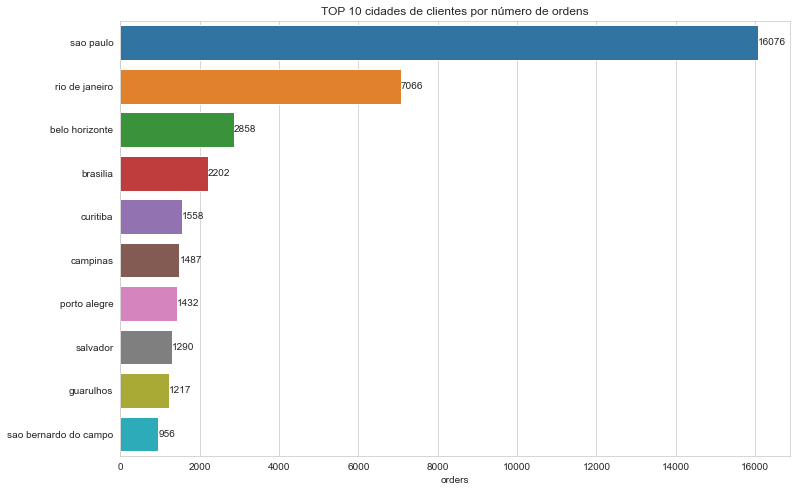

In [45]:
# Principais cidades de clientes com mais ordens
plt.figure(figsize=(12,8))
top_orders_cities = df_data.groupby("customer_city")["order_id"].count().reset_index().sort_values("order_id", ascending=False).rename(columns={"order_id":"orders"})
ax = sns.barplot(x="orders", y="customer_city", data=top_orders_cities[:10])
ax.bar_label(ax.containers[0])
plt.ylabel(None)   
ax.set_title('TOP 10 cidades de clientes por número de ordens')
plt.show()

<h> Aqui é possível ver que São Paulo é uma cidade importante para o negócio, contribuindo para grande parte dos pedidos vindos de clientes dessa cidade. É um ponto estratégico, onde o negócio precisa manter a qualidade do sistema logístico. A próxima análise é verificar quais cidades possuem atrasos nas entregas e, se a cidade de São Paulo estiver incluída na lista de maiores atrasos pode significar um mal sinal para o negócio<h>

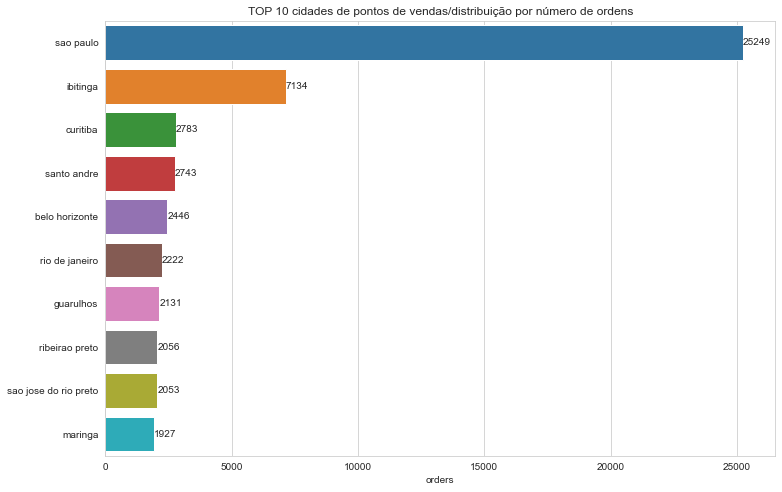

In [46]:
# Principais cidades de pontos de vendas/distribuição com maiores numeros de ordens
plt.figure(figsize=(12,8))
top_sellers_cities = df_data.groupby("seller_city")["order_id"].count().reset_index().sort_values("order_id", ascending=False).rename(columns={"order_id":"orders"})
ax = sns.barplot(x="orders", y="seller_city", data=top_sellers_cities[:10])
ax.bar_label(ax.containers[0])
plt.ylabel(None)   
ax.set_title('TOP 10 cidades de pontos de vendas/distribuição por número de ordens')
plt.show()

<h> Como o número de ordens dos pontos de venda/distribuição na cidade de São Paulo é maior que o número de ordens solicitadas por clientes da mesma cidade, entende-se que os pontos aqui não somente atendem clientes da própria cidade como também de outras e até de outros estados. Um ponto a ser avaliado é se o atendimento de outros locais distantes pode impactar no desempenho desses pontos frente a demanda dentro da própria cidade, já que o número de ordens de clientes nessa localidade é muito maior comparado as outras cidades <h>

In [47]:
# Uma análise de atrasos para as cidades observadas
delay_analysis = df_data[df_data['atrasos'] > 0].groupby(['customer_state', 'customer_city']).agg({'atrasos' : 'sum',
                                                                                 'order_id' : 'nunique'}).reset_index().rename({'atrasos' : 'dias atraso total', 
                                                                                                                                                   'order_id' : 'número de atrasos'}, axis=1)
delay_analysis = delay_analysis.sort_values(by=['número de atrasos','dias atraso total'], ascending=False)
delay_analysis['media de dias por atraso'] = delay_analysis['dias atraso total']/delay_analysis['número de atrasos']

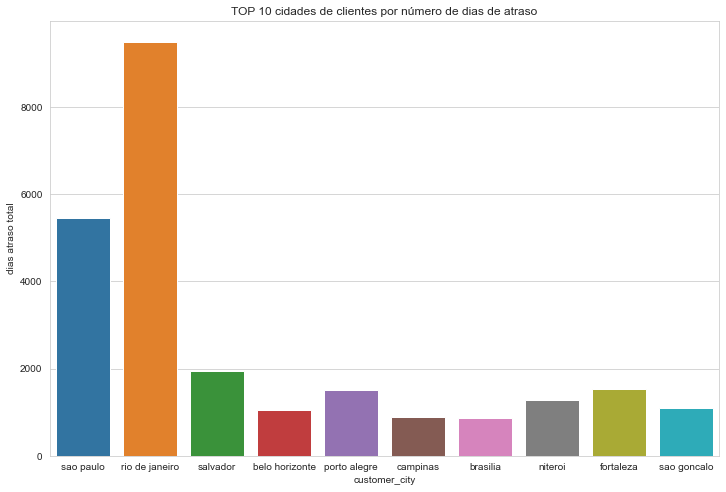

In [48]:
# Dias de atrasos por cidade de clientes
plt.figure(figsize=(12,8))
sns.barplot(x='customer_city', y='dias atraso total', data=delay_analysis[:10])
plt.title('TOP 10 cidades de clientes por número de dias de atraso')
plt.show()

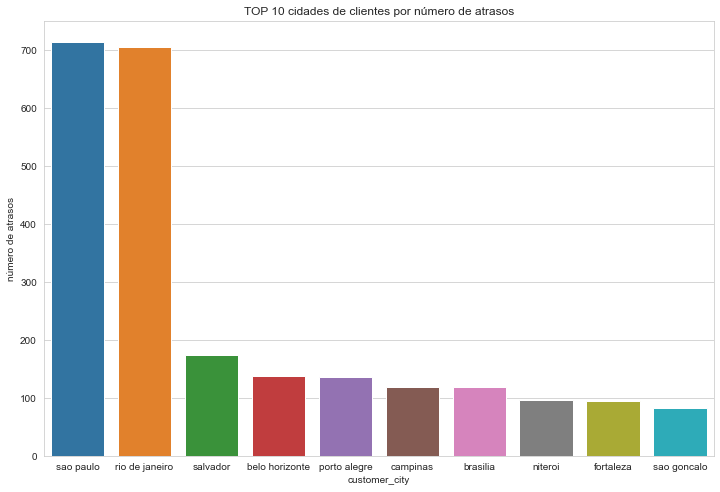

In [49]:
# Número de atrasos por cidade
plt.figure(figsize=(12,8))
sns.barplot(x='customer_city', y='número de atrasos', data=delay_analysis.sort_values(by='número de atrasos', ascending=False)[:10])
plt.title('TOP 10 cidades de clientes por número de atrasos')
plt.show()

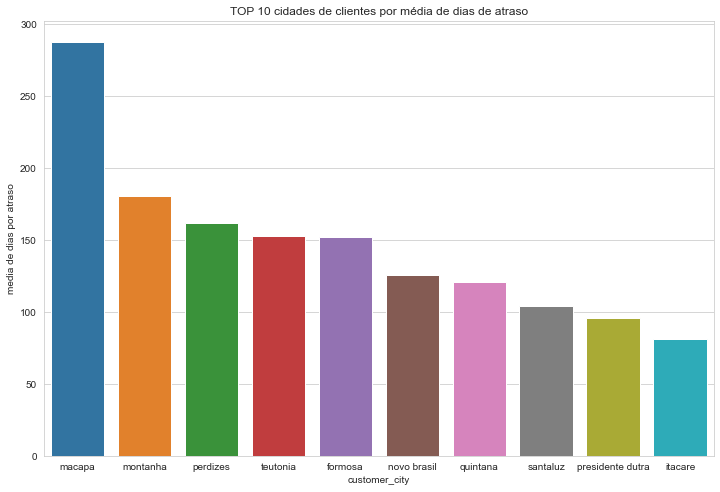

In [50]:
# Média de dias por atraso por cidade
plt.figure(figsize=(12,8))
sns.barplot(x='customer_city', y='media de dias por atraso', data=delay_analysis.sort_values(by='media de dias por atraso', ascending=False)[:10])
plt.title('TOP 10 cidades de clientes por média de dias de atraso')
plt.show()

É esperado que o numero de atrasos e a soma total das requisções feitas aos pontos de venda/distribuição de São Paulo sejam maiores já que esta localidade possui a maior quantidade de requsições. A melhor análise é avaliação o tempo de atraso por requisição das principais localidades avaliadas.

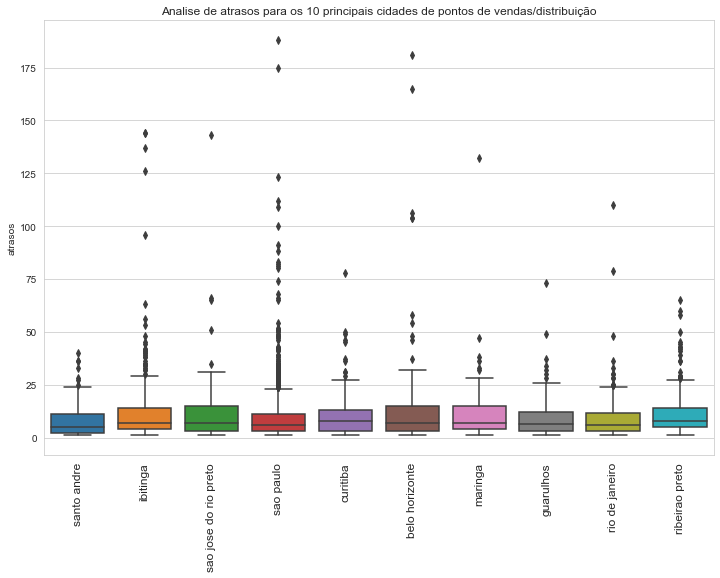

In [51]:
# Estatísticas das 10 principais cidades de clientes
top_delay_analysis = df_data[(df_data['seller_city'].isin(top_sellers_cities[:10]['seller_city'])) & (df_data['atrasos'] > 0)][['seller_city', 'atrasos']]
plt.figure(figsize=(12,8))
sns.boxplot(x='seller_city', y='atrasos', data=top_delay_analysis)
plt.xticks(fontsize=12, rotation=90)
plt.xlabel('')
plt.title('Analise de atrasos para os 10 principais cidades de pontos de vendas/distribuição')
plt.show()

<h> Como é possível observar, as principais cidades de pontos de venda/distribuição possuem valores de atrasos relativamente baixos se comparados com os dias de atrasos das "piores" cidades no quesito tempo entre a entrega prevista e a entrega real. Isso mostra que o sistema logístico para as cidades dos pontos de venda/distribuição que mais recebem ordens de produtos está funcionando relativamente bem, mas é preciso se atentar para quaisquer mudanças de padrão para que os principais centros não sejam impactados, principalmente porque alguns valores altos foram encontrados, embora possam ser possíveis outliers, devem ser observados e devidamente tratados.<h>

#### 4.2 Concentração das principais categorias de produtos por números de ordens

In [52]:
# Verificando as principais categorias de produtos comercializados

df_prod_cat = df_data.groupby(['product_category_name']).agg({'order_id' : 'nunique'}).reset_index().sort_values(by='order_id', ascending=False)
df_prod_cat['cumpercentage'] = df_prod_cat['order_id'].cumsum()/df_prod_cat['order_id'].sum()*100

prod_con = (len(df_prod_cat[df_prod_cat['cumpercentage'] <= 80]) / len(df_prod_cat)) * 100
percent_prods = df_prod_cat[df_prod_cat['cumpercentage'] <= 80]['product_category_name']

print(f'{prod_con:.0f} % das categorias de produtos possuem 80% de ordens aproximadamente \n São eles: \n{percent_prods}')

21 % das categorias de produtos possuem 80% de ordens aproximadamente 
 São eles: 
13           cama_mesa_banho
11              beleza_saude
32             esporte_lazer
44    informatica_acessorios
54          moveis_decoracao
72     utilidades_domesticas
66        relogios_presentes
70                 telefonia
8                 automotivo
12                brinquedos
26                cool_stuff
40        ferramentas_jardim
62                perfumaria
9                      bebes
30               eletronicos
Name: product_category_name, dtype: object


#### 4.2.1 Concentração por cidade

In [53]:
# Mapa de concentração de categorias de produtos e localidades por cidade
df_prod_cat_full = df_data[df_data['product_category_name'].isin(percent_prods)].groupby(['product_category_name',
                                                                                          'customer_lat',
                                                                                          'customer_lon',
                                                                                          'customer_state',
                                                                                          'data entrega real',
                                                                                          'customer_city']).agg({'order_id' : 'nunique'}).reset_index()

df_prod_cat_full['data entrega real'] = df_prod_cat_full['data entrega real'].apply(lambda x: x.strftime('%Y%m'))
df_prod_cat_full = df_prod_cat_full.groupby(['product_category_name',
                                             'data entrega real',
                                             'customer_lat',
                                             'customer_lon',
                                             'customer_state',
                                             'customer_city']).agg({'order_id' : 'nunique'}).reset_index()

df_prod_cat_full = df_prod_cat_full.sort_values(by='data entrega real')

In [54]:
# Com as principais categorias de produtos é possível analisar a evolução desses no tempo em relação a distribuição em todo o território brasileiro
fig = px.scatter_geo(df_prod_cat_full,
                     lat="customer_lat",
                     lon="customer_lon",
                     color="product_category_name",
                     size="order_id",
                     hover_name="customer_state",
                     hover_data=["customer_city"],
                     scope='south america',
                     animation_frame='data entrega real',
                     width=1280,
                     height=720,
                     color_discrete_sequence=px.colors.qualitative.Dark24,
                     )
       
fig.update_layout(margin={"r":20,"t":20,"l":20,"b":20}, title_text='Mapa de concentração de categorias de produtos por localidade', autosize=False,)
fig.update_geos(showsubunits=True,
                subunitcolor="Blue")
fig.show()

<h> É possível observar que os campos de nomes de cidades não possuem muitas informações de nomes corretas. Com isso, a função que captura as coordenadas pelo nome da cidade não consegue preencher os dados de forma correta em todos os casos. Mesmo assim, é possível ver que, ao longo dos anos, o mercado acaba expandindo suas entregas para vários clientes em vários estados, para diversas categorias de produtos. Isso é importante para consolidação do negócio, mas também exige um trabalho maior de gestão logística para atender as necessidades, principalmente por o Brasil ser um país de grandes proporções. <h>

#### 4.2.2 Concentração por estado

In [55]:
# Mapa de concentração de categorias de produtos e localidades por estado
df_cat_state_full = df_data[df_data['product_category_name'].isin(percent_prods)].groupby(['product_category_name',
                                                                                          'customer_state_lat',
                                                                                          'customer_state_lon',
                                                                                          'customer_state',
                                                                                          'data entrega real']).agg({'order_id' : 'nunique'}).reset_index()

df_cat_state_full['data entrega real'] = df_cat_state_full['data entrega real'].apply(lambda x: x.strftime('%Y%m'))
df_cat_state_full = df_cat_state_full.groupby(['product_category_name',
                                             'data entrega real',
                                             'customer_state_lat',
                                             'customer_state_lon',
                                             'customer_state']).agg({'order_id' : 'nunique'}).reset_index()

df_cat_state_full = df_cat_state_full.sort_values(by='data entrega real')
df_cat_state_full['customer_state_lat'] = df_cat_state_full['customer_state_lat'].apply(lambda x: x + np.random.randint(-20, 20) / 30)
df_cat_state_full['customer_state_lon'] = df_cat_state_full['customer_state_lon'].apply(lambda x: x + np.random.randint(-20, 20) / 30)

In [56]:
# Com as principais categorias de produtos é possível analisar a evolução desses no tempo em relação a distribuição em todo o território brasileiro
fig = px.scatter_geo(df_cat_state_full,
                     lat="customer_state_lat",
                     lon="customer_state_lon",
                     color="product_category_name",
                     size="order_id",
                     hover_name="customer_state",
                     hover_data=["customer_state"],
                     scope='south america',
                     animation_frame='data entrega real',
                     width=800,
                     height=600,
                     color_discrete_sequence=px.colors.qualitative.Dark24,
                     
                     )
       
fig.update_layout(margin={"r":20,"t":20,"l":20,"b":20}, title='Mapa de concentração de categorias de produtos e localidades por estado', autosize=False,)

fig.show()

Com o mapa por estados os valores possuem uma qualidade melhor de coordenadas e, dessa forma, é possível verificar o que já havia sido constatado antes.
Em contrapartida as coordenadas dos estados se sobrepoem e fica dificil acompanhar a evolução.

In [57]:
main_cat = df_data.groupby(['product_category_name']).agg({'order_id' : 'nunique'}).reset_index().sort_values(by='order_id', ascending=False)

#### 4.2.3 Evolução das categorias de produtos

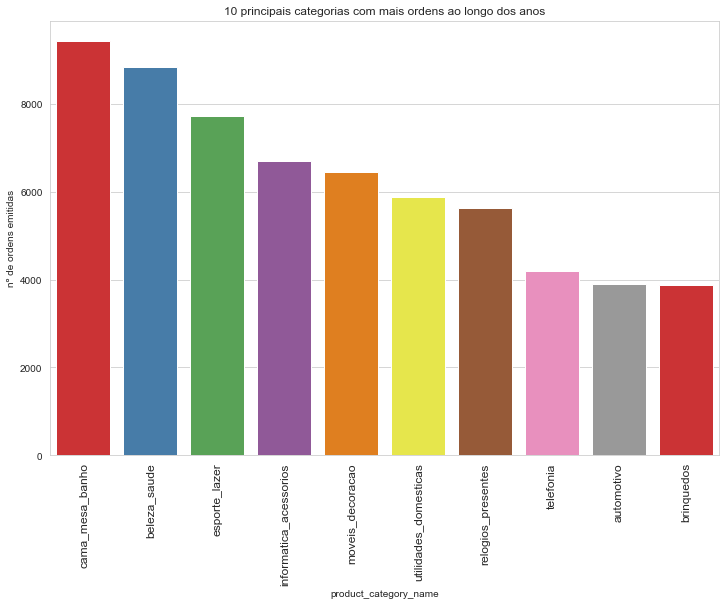

In [58]:
# 10 principais categorias com mais ordens ao longo dos anos
plt.figure(figsize=(12,8))
sns.barplot(x='product_category_name', y='order_id', data=main_cat[:10], palette=sns.color_palette("Set1", 10))
plt.xticks(rotation=90, fontsize=12)
plt.ylabel('nº de ordens emitidas')
plt.title('10 principais categorias com mais ordens ao longo dos anos')
plt.show()

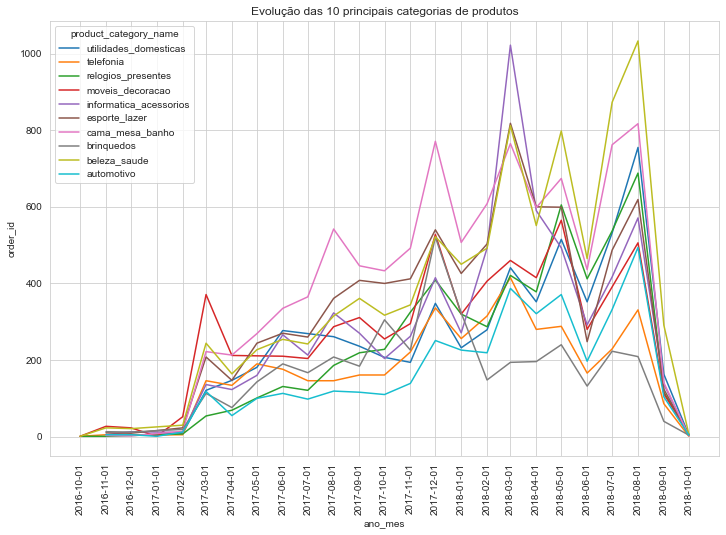

In [59]:
# Verificando evolução das 10 principais categorias de produtos
df_prod_cat_analysis = df_data[df_data['product_category_name'].isin(main_cat[:10]['product_category_name'])].groupby(['product_category_name', 'ano_mes']).agg({'order_id' : 'nunique'}).reset_index()
df_prod_cat_analysis['ano_mes'] = df_prod_cat_analysis['ano_mes'].apply(lambda x: dt.datetime.strptime(x, '%Y%m').date())
df_prod_cat_analysis = df_prod_cat_analysis.sort_values(by=['product_category_name', 'ano_mes'], ascending=[False, True])
df_prod_cat_analysis['variacao mes anterior'] =(df_prod_cat_analysis['order_id'] - df_prod_cat_analysis['order_id'].shift(1).fillna(0))
plt.figure(figsize=(12,8))
sns.lineplot(x='ano_mes', y='order_id', data=df_prod_cat_analysis, hue='product_category_name')
plt.xticks(df_prod_cat_analysis['ano_mes'].unique(), rotation=90)
plt.title('Evolução das 10 principais categorias de produtos')
plt.show()

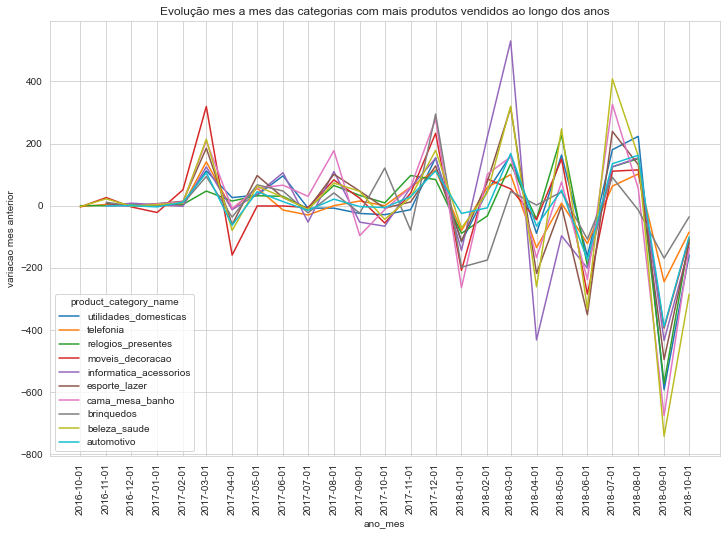

In [60]:
# Verificando evolução das categorias pelos produtos mais vendidos
plt.figure(figsize=(12,8))
sns.lineplot(x='ano_mes', y='variacao mes anterior', data=df_prod_cat_analysis, hue='product_category_name')
plt.xticks(df_prod_cat_analysis['ano_mes'].unique(), rotation=90)
plt.title('Evolução mes a mes das categorias com mais produtos vendidos ao longo dos anos')
plt.show()


Olhando para as 10 principais categorias com o maior número de ordens emitidas é possível ver que a maioria teve bons crescimentos ao longo dos meses desde 2016 sofrendo quedas a partir do segundo quadrimestre de 2018. No segundo gráfico de variação mês a mês é possível ver que essas categorias enfrentaram padrões de alta e baixa ao longo dos meses. Adicionando o fator de queda no ano de 2018 é importante avaliar o mercado e criar estratégias competitivas para poder alavancar as vendas. Como o e-commerce obteve bons desempenhos em 2018 uma queda nos maiores nichos de produtos pode significar uma perda de competitividade com a entrada de novos competidores ao longo dos anos.

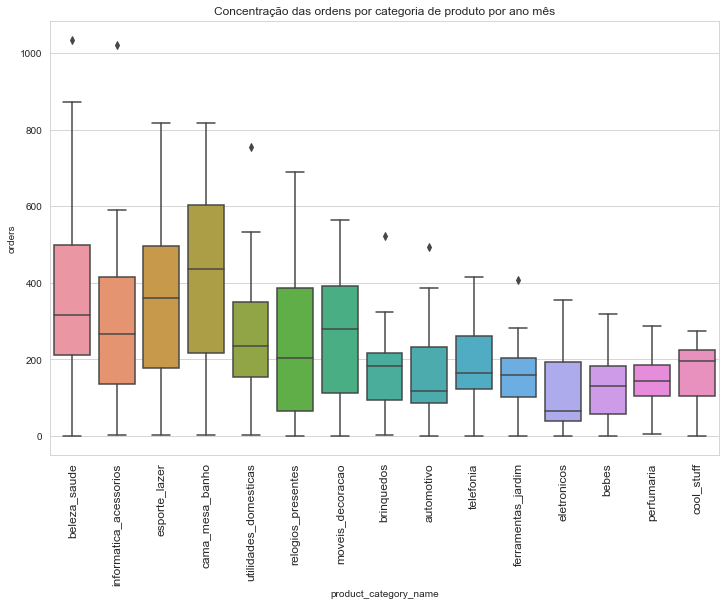

In [61]:
# Verificando a concentração dos dados ao longo do tempo
order_period = df_data[df_data['product_category_name'].isin(percent_prods)].groupby(['ano_mes', 'product_category_name']).agg({'order_id' : 'nunique'}).reset_index().rename(columns={'order_id' : 'orders'}).sort_values(by='orders', ascending=False)
plt.figure(figsize=(12,8))
sns.boxplot(x='product_category_name', y='orders' , data=order_period)
plt.xticks(rotation=90, fontsize=12)
plt.title('Concentração das ordens por categoria de produto por ano mês')
plt.show()

<h> Aqui é possível observar que alguns produtos sofreram alta variablidade nos pedidos ao longo dos meses, como "beleza_saude", "informática_acessorios", "cama_mesa_banho", "esporte_lazer" e "relogios_presentes". Como essas categorias estão no grupo dos que compoe 80% das ordens entregues, é importante criar estratégias de manutenção das vendas ao longo dos períodos de diminuição do consumo desses produtos com estratégias de alavancagem de vendas, por exemplo. <h>

#### 4.2 Verificando preços dos pedidos e influência do frete no valor final

Freight Value : Skew: 5.5437487614347365, : SkewtestResult(statistic=278.8926972073655, pvalue=0.0)
Price : Skew: 7.814333783028428, : SkewtestResult(statistic=315.2373341101914, pvalue=0.0)


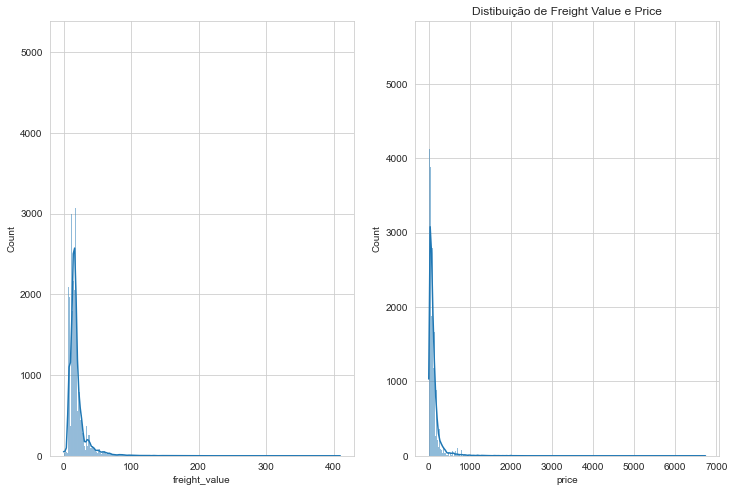

In [62]:
# Verificando e ajustando as distribuições de preço e frete
freight_skew = stats.skew(df_data['freight_value'])
freight_skewtest = stats.skewtest(df_data['freight_value'])
price_skew = stats.skew(df_data['price'])
price_skewtest = stats.skewtest(df_data['price'])
fig, ax = plt.subplots(figsize=(12,8), ncols=2, nrows=1)
sns.histplot(df_data['freight_value'], kde=True, ax=ax[0])
sns.histplot(df_data['price'], kde=True, ax=ax[1])
plt.title('Distibuição de Freight Value e Price')
print(f'Freight Value : Skew: {freight_skew}, : {freight_skewtest}')
print(f'Price : Skew: {price_skew}, : {price_skewtest}')
plt.show()

dist Value : Skew: 1.3025152081508098, : SkewtestResult(statistic=132.98664291670352, pvalue=0.0)


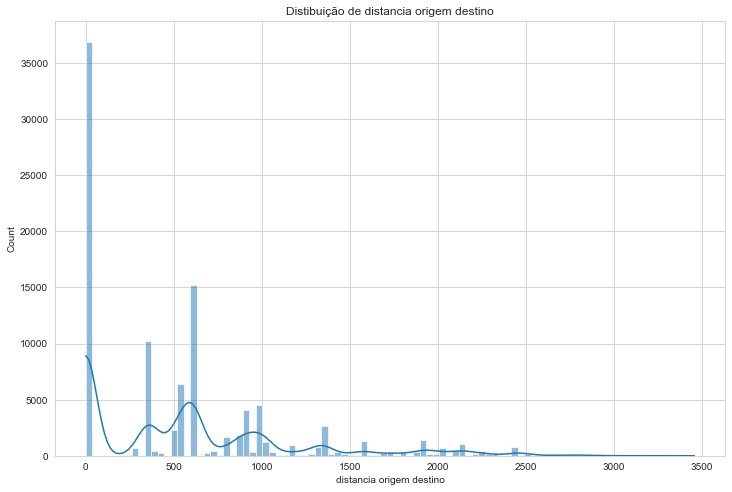

In [63]:
dist_skew = stats.skew(df_data['distancia origem destino'])
dist_skewtest = stats.skewtest(df_data['distancia origem destino'])
plt.figure(figsize=(12,8))
sns.histplot(df_data['distancia origem destino'], kde=True)
plt.title('Distibuição de distancia origem destino')
print(f'dist Value : Skew: {dist_skew}, : {dist_skewtest}')
plt.show()

In [64]:
# Ajustando as distribuições de preço e frete

df_data['log frete'] = np.log(df_data['freight_value'].apply(lambda x: x if x != 0 else 1))
df_data['log preço'] = np.log(df_data['price'].apply(lambda x: x if x != 0 else 1))
df_data['log dist'] = np.log(df_data['distancia origem destino'].apply(lambda x: x if x != 0 else 1))

Freight Value : Skew: -0.6087143957699785, : SkewtestResult(statistic=-73.56842059108716, pvalue=0.0)
Price : Skew: 0.2702665411476977, : SkewtestResult(statistic=34.69948614879823, pvalue=8.020092970368118e-264)


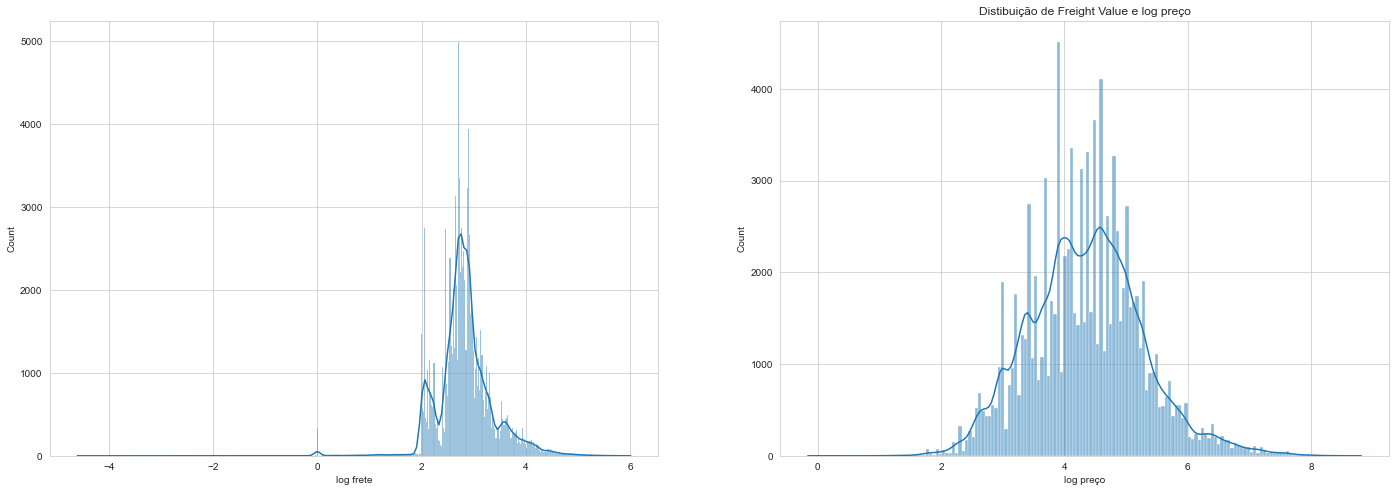

In [65]:
freight_skew = stats.skew(df_data['log frete'])
freight_skewtest = stats.skewtest(df_data['log frete'])
price_skew = stats.skew(df_data['log preço'])
price_skewtest = stats.skewtest(df_data['log preço'])
fig, ax = plt.subplots(figsize=(24,8), ncols=2, nrows=1)
sns.histplot(df_data['log frete'], kde=True, ax=ax[0])
sns.histplot(df_data['log preço'], kde=True, ax=ax[1])
plt.title('Distibuição de Freight Value e log preço')
print(f'Freight Value : Skew: {freight_skew}, : {freight_skewtest}')
print(f'Price : Skew: {price_skew}, : {price_skewtest}')
plt.show()

dist Value : Skew: -0.5211515196598124, : SkewtestResult(statistic=-64.15934673237464, pvalue=0.0)


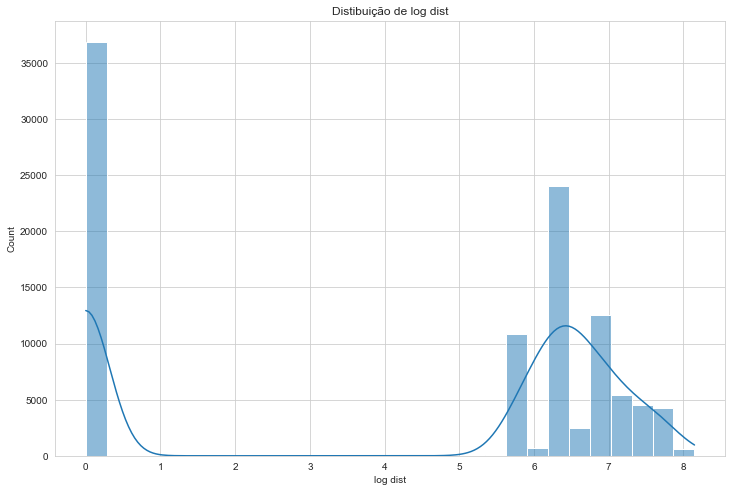

In [66]:
dist_skew = stats.skew(df_data['log dist'])
dist_skewtest = stats.skewtest(df_data['log dist'])
plt.figure(figsize=(12,8))
sns.histplot(df_data['log dist'], kde=True)
plt.title('Distibuição de log dist')
print(f'dist Value : Skew: {dist_skew}, : {dist_skewtest}')
plt.show()

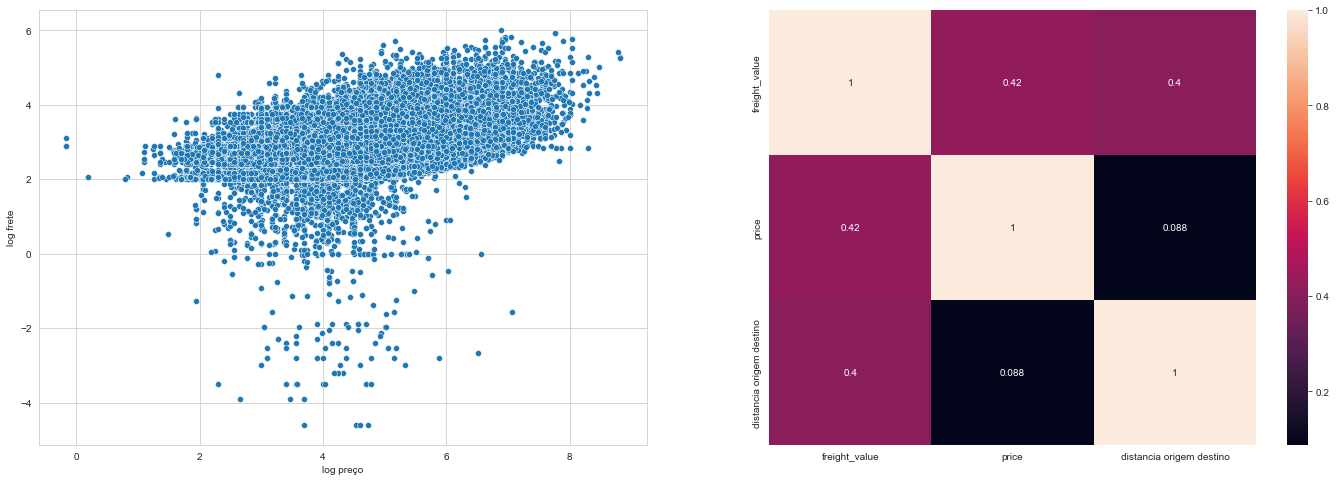

In [67]:
# Correlação e disperção das novas variáveis
fig, ax = plt.subplots(figsize=(24,8), ncols=2, nrows=1)

sns.scatterplot(x='log preço', y='log frete', data=df_data, ax=ax[0])
sns.heatmap(df_data[['freight_value', 'price','distancia origem destino']].corr(), annot=True, ax=ax[1])

plt.show()

É possivel observar que não existe uma relação linear forte entre o preço do item e o frete estabelecido, bem como o frete e a distância entre um estado e outro. Um agrupamento pode ser executado para entender melhor a distribuição e variação desses valores ao longo dos dados.

### 4.2.1 Agrupando os dados para preço e frete

In [68]:
# Transformando os dados em um formato de dados que possa ser utilizado pelo modelo
scaler = StandardScaler()

freight_price_scaled = pd.DataFrame(scaler.fit_transform(df_data[['log preço', 'log frete']]), columns=['log preço', 'log frete'])

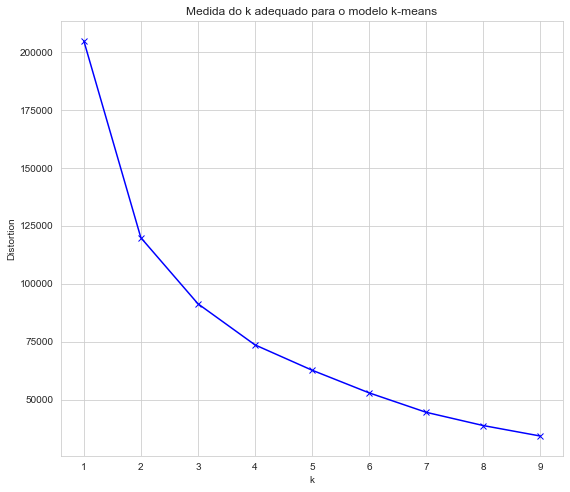

In [69]:
# Treinando modelo k-means
# Avaliação de melhor cluster de agregação de frete e preço com a curva do "cotovelo"
# Distância das observações até o centro do cluster 

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(freight_price_scaled)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(9,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Medida do k adequado para o modelo k-means')
plt.show()

In [70]:
# Treinando o modelo com 4 clusters segundo a otimização anterior
k = 4
df_cluster_fp = df_data[['price', 'freight_value']].copy()
kmean_model = KMeans(n_clusters=k, random_state=5)
y_kmean = kmean_model.fit_predict(df_cluster_fp)
# Adicionando os clusters
df_cluster_fp['Cluster'] = kmean_model.labels_

In [71]:
df_cluster_fp_full = df_cluster_fp[['Cluster']].merge(df_data, left_index=True, right_index=True)

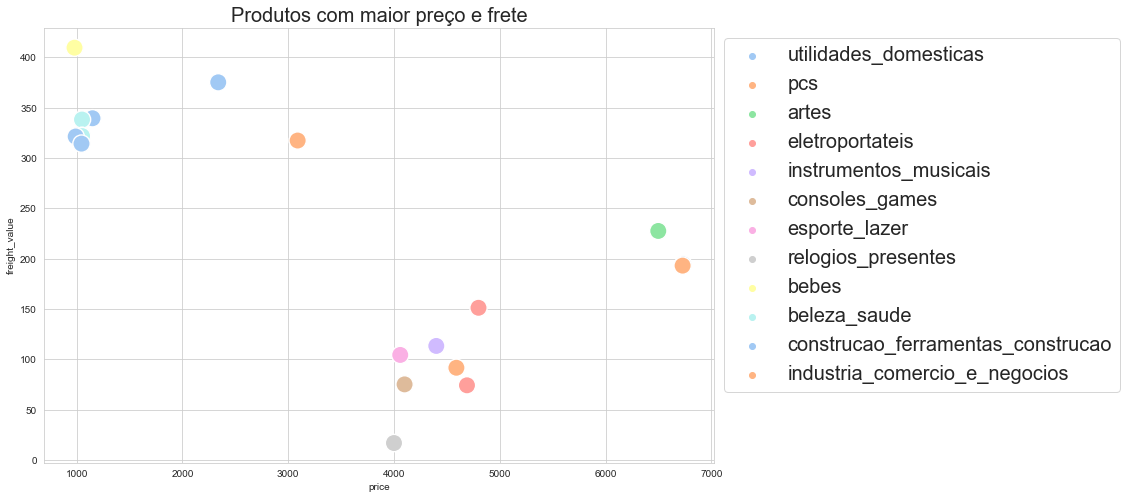

In [72]:
# Verificando produtos com maior preço e frete

cluster_price = df_cluster_fp_full.sort_values(by='price', ascending=False)[:10][['price', 'freight_value', 'Cluster', 'product_category_name']].drop_duplicates()
cluster_freight = df_cluster_fp_full.sort_values(by='freight_value', ascending=False)[:10][['price', 'freight_value', 'Cluster', 'product_category_name']].drop_duplicates()
price_freight_concat = pd.concat([cluster_price, cluster_freight])
plt.figure(figsize=(12,8))
sns.scatterplot(x='price', y='freight_value', hue='product_category_name',s=300, data=price_freight_concat, palette=sns.color_palette(palette='pastel', n_colors=len(price_freight_concat['product_category_name'].unique())))
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=20)
plt.title('Produtos com maior preço e frete', fontsize=20)
plt.show()

É possível ver que os principais produtos com maior custo de frete são produtos de saúde e beleza, ferramentas e construção, industrial comércios e negócios e bebes. Em contrapartida os produtos com os maiores preços são relogios, consoles de games, eletroportáteis, pcs e artes.

Provavelmente o valor menor de frete para produtos de alto valor agregado pode se dar pelo menor tamanho que gera um menor custo logístico para transportadora em muitos casos.

Seguindo o mesmo raciocínio, os produtos listados com altos fretes provavelmente são produtos com altas dimensões que requerem uma estratégia de transporte com custo mais elevado aumentando, assim, o custo do frete.

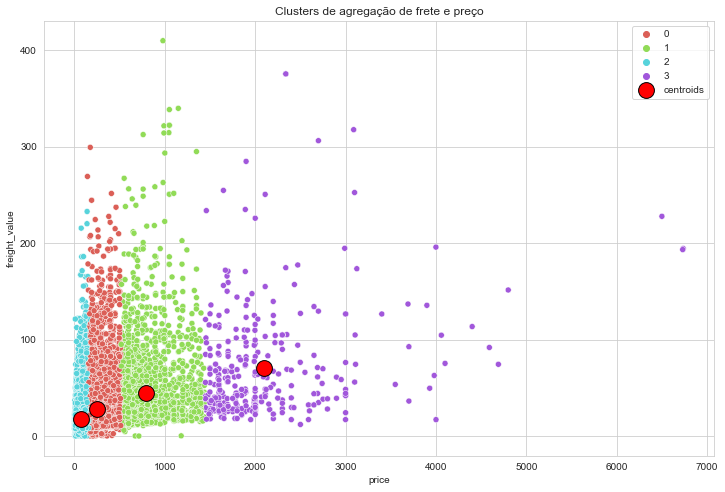

In [73]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price', y='freight_value', hue='Cluster', data=df_cluster_fp, palette=sns.color_palette('hls', k))
plt.scatter(kmean_model.cluster_centers_[:, 0], kmean_model.cluster_centers_[:, 1], s=250, marker='o', c='red', edgecolor='black', label='centroids')
plt.legend(scatterpoints=1)
plt.title('Clusters de agregação de frete e preço')
plt.show()

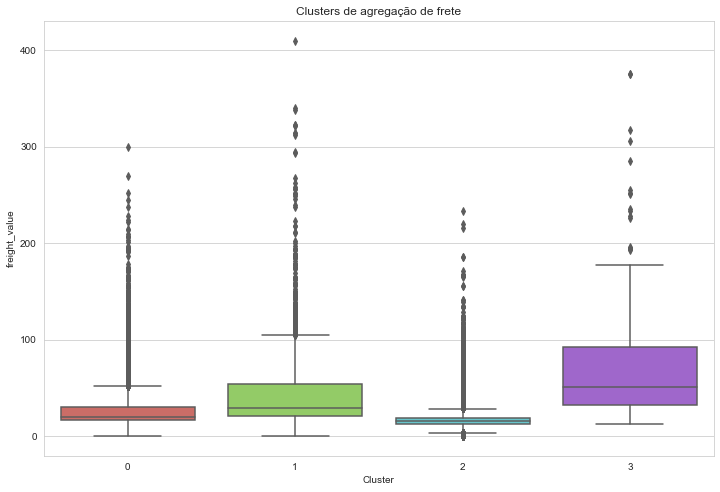

In [74]:
# Varição de frete por cluster
plt.figure(figsize=(12,8))
sns.boxplot(x='Cluster', y='freight_value', data=df_cluster_fp, palette=sns.color_palette('hls', k))
plt.title('Clusters de agregação de frete')
plt.show()

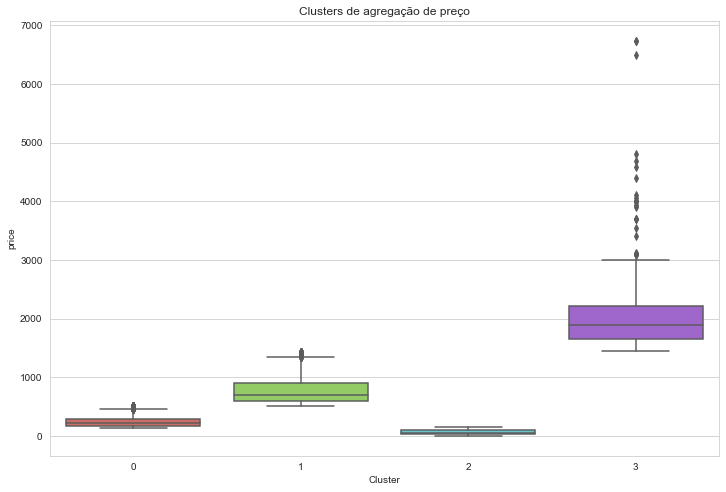

In [75]:
# Varição de preço por cluster
plt.figure(figsize=(12,8))
sns.boxplot(x='Cluster', y='price', data=df_cluster_fp, palette=sns.color_palette('hls', k))
plt.title('Clusters de agregação de preço')
plt.show()

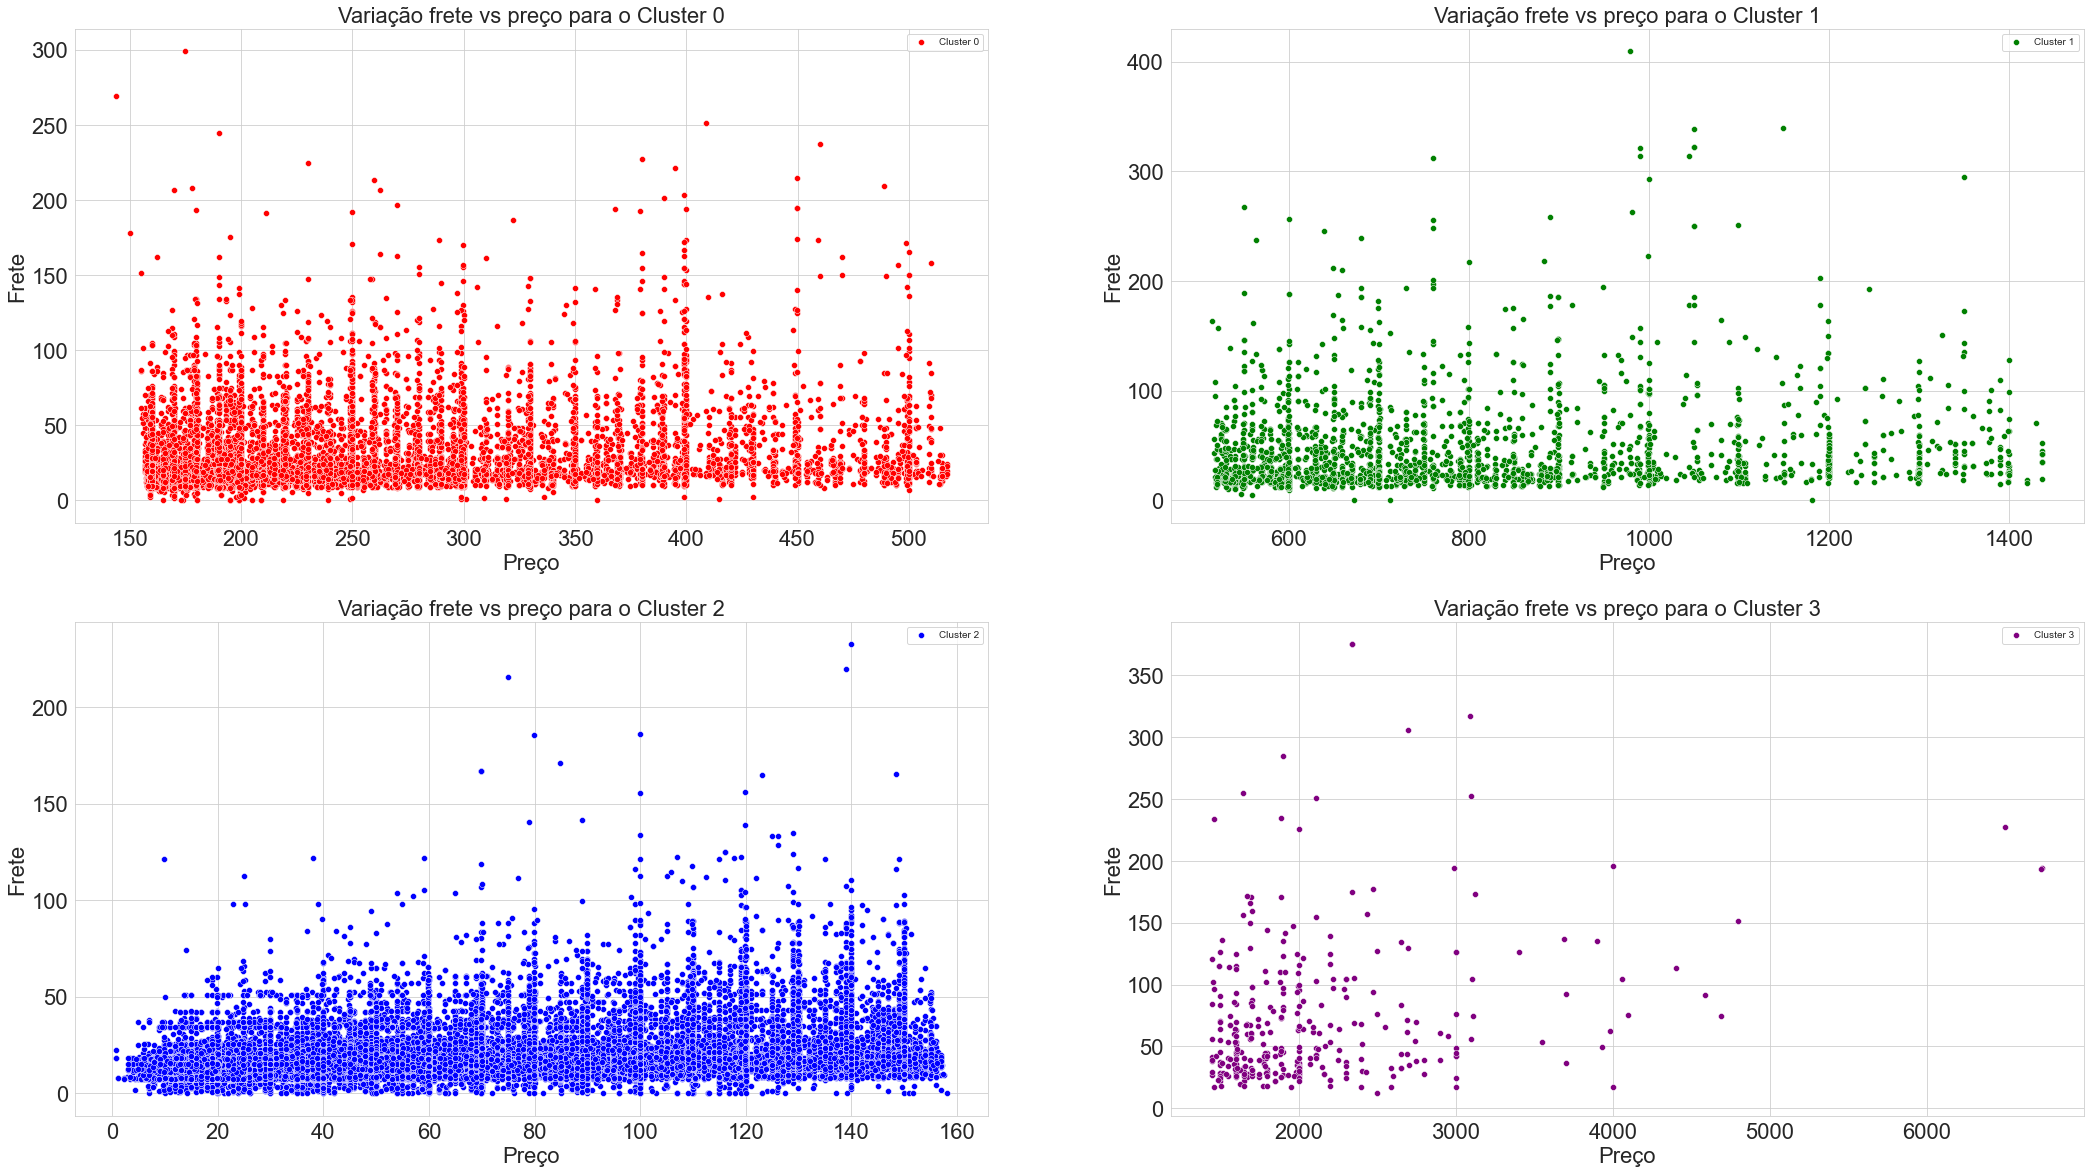

In [76]:
# Avaliação do cluste 0
fig, ax = plt.subplots(figsize=(36,20), ncols=2, nrows=2)
sns.scatterplot(x='price', y='freight_value',  data=df_cluster_fp[df_cluster_fp['Cluster'] == 0], color='red', ax=ax[0][0], label='Cluster 0')
ax[0][0].set_title('Variação frete vs preço para o Cluster 0', fontsize=22)
ax[0][0].set_xlabel('Preço', fontsize=22)
ax[0][0].set_ylabel('Frete', fontsize=22)
ax[0][0].xaxis.set_tick_params(labelsize=22)
ax[0][0].yaxis.set_tick_params(labelsize=22)
sns.scatterplot(x='price', y='freight_value',  data=df_cluster_fp[df_cluster_fp['Cluster'] == 1], color='green', ax=ax[0][1], label='Cluster 1')
ax[0][1].set_title('Variação frete vs preço para o Cluster 1', fontsize=22)
ax[0][1].set_xlabel('Preço', fontsize=22)
ax[0][1].set_ylabel('Frete', fontsize=22)
ax[0][1].xaxis.set_tick_params(labelsize=22)
ax[0][1].yaxis.set_tick_params(labelsize=22)
sns.scatterplot(x='price', y='freight_value',  data=df_cluster_fp[df_cluster_fp['Cluster'] == 2], color='blue', ax=ax[1][0], label='Cluster 2')
ax[1][0].set_title('Variação frete vs preço para o Cluster 2', fontsize=22)
ax[1][0].set_xlabel('Preço', fontsize=22)
ax[1][0].set_ylabel('Frete', fontsize=22)
ax[1][0].xaxis.set_tick_params(labelsize=22)
ax[1][0].yaxis.set_tick_params(labelsize=22)
sns.scatterplot(x='price', y='freight_value',  data=df_cluster_fp[df_cluster_fp['Cluster'] == 3], color='purple', ax=ax[1][1] ,label='Cluster 3')
ax[1][1].set_title('Variação frete vs preço para o Cluster 3', fontsize=22)
ax[1][1].set_xlabel('Preço', fontsize=22)
ax[1][1].set_ylabel('Frete', fontsize=22)
ax[1][1].xaxis.set_tick_params(labelsize=22)
ax[1][1].yaxis.set_tick_params(labelsize=22)
plt.show()

Na tentativa de agrupar os valores de frete e preço em "clusters" de análises observamos que a variável de preço se comportou relativamente bem em relação às análises dos dados e a dispersão de seus valores em possíveis outliers. Por outro lado, os valores finais de fretes parecem possuir muitos possíveis outliers com valores acima das variações normais. Isso é um fator importante a ser explorado pois variações de fretes muito dispersas podem implicar que as estratégias de cotações de fretes não estão muito boas. Como foi dito no inicio do projeto, segundo o artigo mencionado, muitos clientes abandonam o carrinho por conta de um valor de frete muito elevado. Logo, uma estratégia de frete ruim que gera muitos valores de frete cotados acima do padrão podem contribuir para o abandono das cestas de produtos nas plataformas de e-commmerce.

Interpretação dos clusters:

<b>Cluster 0</b>: Grande quantidade de itens negociados a preços intermediários com dispersão de fretes constantes embora boa parte dos itens estejam concentrados em valores mais baixos. O valores de fretes variam até 100 reais com alguns com a minoria de casos acima desse valor. Possui itens cujo valor do frete corresponde a um percentual considerável do preço ou as vezes até um valor maior de frete do que do próprio produto. Como esse conjunto corresponde a grande parte dos produtos negociados é importante se atentar ao impacto no valor final do item e o abondono desses produtos no carrinho.

<b>Cluster 1</b>: Poucos itens negociados com alto preço. Poucos itens com valores de frete correspondendo e mais de 1/3 do preço e no máximo 2/3. Pode ser criada uma estratégia melhor de cotação de fretes para esses itens de preços mais elevados, principalmente nas faixas de valores de preços com maiores dispersões do valor de frete.

<b>Cluster 2</b>: Também possui grande parte da concentração dos itens negociados com o cluster de menores preços dos itens. Possui muitos itens com valores de fretes que correspondem de 30 mais de 100% o valor do item. Principalmente para os itens de menor preço, isso é um grande problema. Se levarmos em consideração o tamanho e o valor do item e o preço mínimo de frete estabelecido pelas transportadoras, além de melhorar a negociação do frete é possível criar estratégias que incentivem o consumidor a comprar várias quantidades do item bem como itens simulares de compra conjunto. Isso pode ser feito através de sistemas de recomendações na plataforma de e-commerce. Essa estratégia pode ser tomada tanto do lado de vendas como do lado de cotação de frete com incentivo em recomendações de adicionar determinados itens para melhor rateio de custo. Essas informações podem ser disponibilizadas para o consumo na tentativa de demonstrar a ele que comprar mais itens é uma melhor estratégia do que abandonar a compra.

<b>Cluster 3</b>: Pouca concentração de itens e que possuem um alto preço. Provavelmente itens que atendem a um nicho menor de clientes. Esses itens possuem, geralmente, em torno de 10% do preço em valor de frete. Também podem ser considerados como itens importantes por possuírem alto preço, controlar as disperções de frete também é importante no que diz respeito à concorrência desses itens com outras lojas.

### 4.2.1 Agrupando relação entre frete e distância

In [77]:
# Transformando os dados em um formato de dados que possa ser utilizado pelo modelo
scaler = StandardScaler()

freight_dist_scaled = pd.DataFrame(scaler.fit_transform(df_data[['log frete', 'log dist']]), columns=['log frete', 'log dist'])

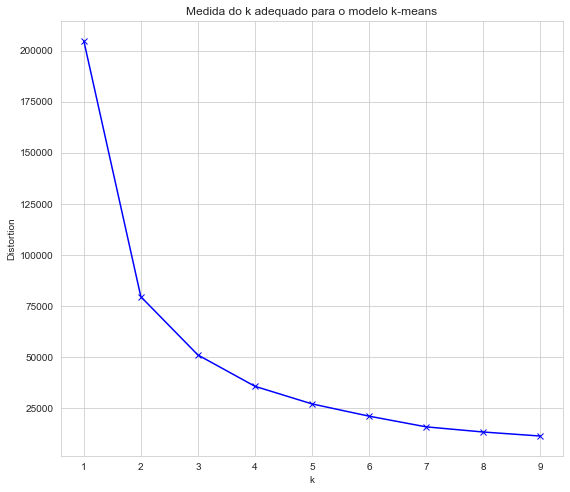

In [78]:
# Treinando modelo k-means
# Avaliação de melhor cluster de agregação de frete e preço com a curva do "cotovelo"
# Distância das observações até o centro do cluster 

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(freight_dist_scaled)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(9,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Medida do k adequado para o modelo k-means')
plt.show()

In [79]:
# Treinando o modelo com 3 clusters segundo a otimização anterior
k = 3
df_cluster_fd = df_data[['freight_value', 'distancia origem destino']].copy()
kmean_model = KMeans(n_clusters=k, random_state=5)
y_kmean = kmean_model.fit_predict(df_cluster_fd)
# Adicionando os clusters
df_cluster_fd['Cluster'] = kmean_model.labels_

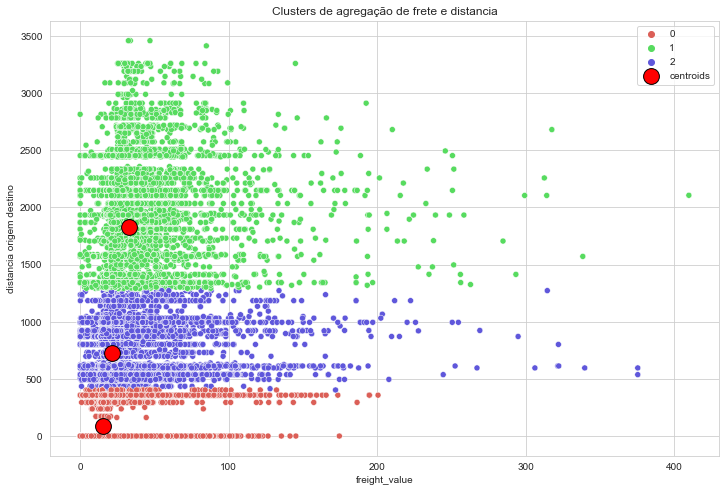

In [80]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='freight_value', y='distancia origem destino', hue='Cluster', data=df_cluster_fd, palette=sns.color_palette('hls', k))
plt.scatter(kmean_model.cluster_centers_[:, 0], kmean_model.cluster_centers_[:, 1], s=250, marker='o', c='red', edgecolor='black', label='centroids')
plt.legend(scatterpoints=1)
plt.title('Clusters de agregação de frete e distancia')
plt.show()

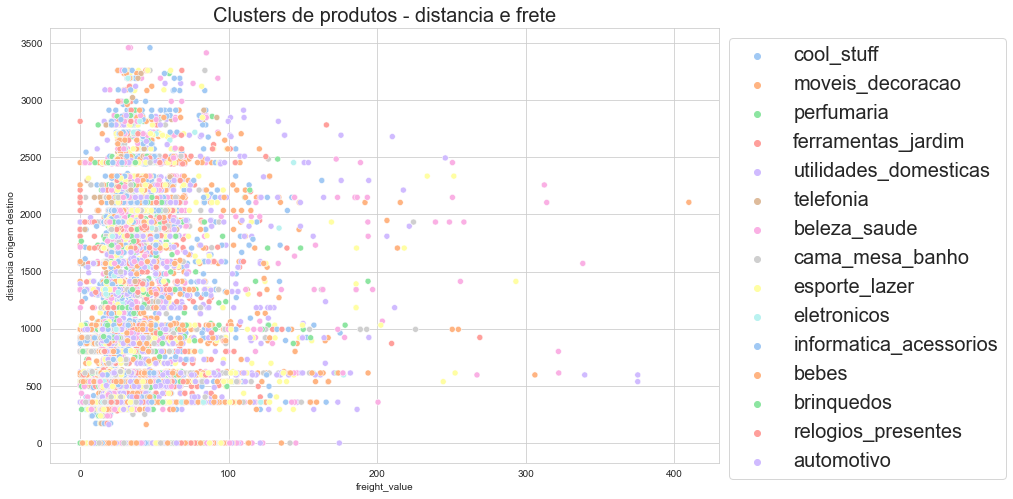

In [81]:
df_cluster_fd_full = df_cluster_fd[['Cluster']].merge(df_data, left_index=True, right_index=True)
plt.figure(figsize=(12,8))
sns.scatterplot(x='freight_value', y='distancia origem destino', hue='product_category_name', data=df_cluster_fd_full[df_cluster_fd_full['product_category_name'].isin(percent_prods)], palette=sns.color_palette(palette='pastel', n_colors=len(percent_prods)))
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=20)
plt.title('Clusters de produtos - distancia e frete', fontsize=20)
plt.show()

Como para um mesmo intervalo de distâncias o frete não altera o seu valor e uma análise das principais categorias de produtos também não revela uma tendência no valor de frete em relação a especificidade do nicho o frete não parece ter uma relação forte com esses fatores. Logo, boa parte dessa variação pode estar vindo de estratégias ruins de cotação de frete nas plataformas de e-commerce.

<b>Análise geral</b>: A análise de preço e frete levou em consideração a relação direta entre essas duas variáveis. Não foi possível, por exemplo, comparar o impacto do tamanho do item na cotação do frete, a distância entre o estado de origem e de destino. Esses fatores também podem ser importantes para as variações de frete em relação aos itens. De forma geral, foram encontrados alguns problemas de valor de frete muito elevados em relação ao preço dos itens e isso, em qualquer cenário é ruim para o negócio. Portanto, é preciso monitorar esses dados continuamente para evitar o fenômeno de abandono dos carrinhos por conta do aumento do valor final do item. Isso é um fator essencial para manter o crescimento do E-commerce no cenário brasileiro.

# 5. Modelling <a class="anchor" id="Modelling"></a>
Como a estratégia de análise era estritamente exploratória, o modelo criado de clusterização foi usado para comparativo e agrupamento de padrões que poderiam ser reconhecidos.



## 5.1. Modelling technique <a class="anchor" id="ModellingTechnique"></a>
A técnica utilizada foi a clusterização pelo método Kmeans para agrupamentos de frete e preço e frete e distância e a Análise Exploratória dos Dados (EDA) de forma geral.

## 5.2. Modelling assumptions <a class="anchor" id="ModellingAssumptions"></a>
- Os dados fornecidos são suficientes para as análises propostas a partir dos modelos de clusterização.
- A distância em linha reta entre 2 estados é o estimador mais adequado para os dados que foram fornecidos.


## 5.4. Assess Model <a class="anchor" id="AssessModel"></a>
A avaliação do modelo, nesse caso, corresponderá ao objetivo de data mining como um todo. Assim, as questões previamente abordadas serão reavaliadas e respondidas com o conhecimento adquirido através da análise exploratória dos dados:

- Questões a serem abordadas seguindo os principais topicos do requisito do projeto:
    - Origem e destino de produtos:
        - Quais são as principais localidades que recebem produtos?
        - R: Como visto na seção 4.1, as principais cidades que recebem produtos são São Paulo e Rio de Janeiro, sendo os principais estados: SP, RJ, MG, RS, PR e SC. 
        - Dentre essas localidades, o sistema logístico tem funcionado de forma adequada?
        - R: Sim, vimos que as principais cidades tem tido uma variação de atrasos baixa, embora alguns valores fora do padrão e elevados podem ser preocupantes.
    - Preço dos pedidos e como o frete impacta o valor final:
        - Existe alguma relação entre o preço total do item e o frete sobre ele?
            - R: Existe uma leve tendência de que os itens com preços mais elevados possuam fretes de valor maior, mas como a dispersão do frete acaba sendo grande fica difícil validar com certeza essa tendência.
        - Quais os produtos com maior valor de frete?
            - R:Como visto, os principais produtos com maior custo de frete são produtos de saúde e beleza, ferramentas e construção, industrial comércios e negócios e bebes.
        - Quais os produtos com maior valor de preço?
           - R:Os produtos com os maiores preços são relogios, consoles de games, eletroportáteis, pcs e artes.
    - Categorias de produtos:
        - Como as categorias de produtos têm evoluído ao longo do tempo?
            - R: Como visto na seção 4.2.3, as 10 principais categorias que obtiveram o maior número de ordens no geral, tiveram um desempenho crescente no número de ordens ao longo dos meses com uma queda iniciando a partir do segundo quadrimestre de 2018. Outro ponto observado é que essas categorias tiveram uma variação de crescimento mes a mes com meses em redução e outros em crescimento, embora no geral o cenário foi de crescimento até 2018.
        - Quais os principais produtos comercializados?
            - R: Como visto na seção 4.2.3, os produtos que geraram 81% das ordens foram cama_mesa_banho, beleza_saude, esporte_lazer, informatica_acessorios, moveis_decoracao, utilidades_domesticas', relogios_presentes, telefonia, automotivo, brinquedos, cool_stuff, ferramentas_jardim, perfumaria, bebes, eletronicos.
        
    Os demais insights gerados estão listados em cada seção onde foram elaboradas as devidas análises.
        

### 5.4.1 Conclusão

Como visto, todas as questões puderam ser respondidas com os dados, embora alguns problemas como valores faltantes em alguns campos e informações faltantes de variáveis como tamanho dos itens impedissem que análises mais profundas pudessem ser elaboradas.

No geral os pontos principais obtidos foram que embora o cenário do e-commerce fosse de crescimento, houve uma queda no número de ordens a partir do segundo quadrimestre de 2018. Como dito, é importante avaliar se as estratégias de vendas estão sendo competitivas e suficientes para manter o crescimento contínuo junto ao crescimento do mercado de forma geral.
A partir desse ponto, uma importante estratégia que pode ser abordada, é sobre as cotações de fretes, pois foi observado que os valores de fretes possuem um padrão de dispersão relativamente alto enquanto o preço tinha uma padrão de variação menor. Como citado inicialmente, valores altos de frete podem gerar a desistência do cliente no ato da compra e uma variação grande no valor de frete pode indicar uma cotação ruim de fretes na plataforma de e-commerce avaliada.

Outro aspecto é manter o monitoramento das principais regiões de origens e destinos de produtos que perpetuam as principais rotas de distribuição. Municípios e estados que possuem altos índices de atrasos precisam ser observados, principalmente aqueles que compõem as principais rotas de distribuição observadas na análise exploratória.